In [49]:
import pandas as pd



In [50]:
%pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [169]:
file_path = '/Users/charishmapuli/Downloads/tripadvisor.com-organic.Positions-us-20240719-2024-07-20T16_10_20Z.xlsx'
data = pd.read_excel(file_path)

print(data.head(21))


/Users/charishmapuli/Library/Python/3.9/lib/python/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


                        Keyword  Position  Previous position  Search Volume  \
0                  food near me         2                  2       24900000   
1           restaurants near me         2                  2       11100000   
2                  food near me         8                  1       24900000   
3         places to eat near me         1                  1        1500000   
4                  trip advisor         1                  1         450000   
5                   tripadvisor         1                  1         450000   
6                   restaurants         1                  1         823000   
7          things to do near me         2                  2        1000000   
8                       flights         4                  3        6120000   
9            restaurant near me         1                  1         450000   
10                 food near me        14                 13       24900000   
11               dinner near me         1           

In [52]:
print(type(data))
print(data.head())

# Ensure column names are clean
data.columns = data.columns.str.strip()

# Display column names to confirm
print(data.columns)



<class 'pandas.core.frame.DataFrame'>
                 Keyword  Position  Previous position  Search Volume  \
0           food near me         2                  2       24900000   
1    restaurants near me         2                  2       11100000   
2           food near me         8                  1       24900000   
3  places to eat near me         1                  1        1500000   
4           trip advisor         1                  1         450000   

   Keyword Difficulty   CPC  \
0                  92  2.49   
1                  96  1.58   
2                  92  2.49   
3                  57  1.90   
4                  73  0.50   

                                                 URL  Traffic  Traffic (%)  \
0            https://www.tripadvisor.com/Restaurants  3286800         2.34   
1            https://www.tripadvisor.com/Restaurants  1465200         1.04   
2  https://www.tripadvisor.com/ShowTopic-g60331-i...   473100         0.33   
3            https://www.tripa

Keyword Performance Analysis:
Compare the current positions of keywords with their previous positions to identify trends and performance changes.
Analyze the search volume and CPC (Cost Per Click) for different keywords to understand their value and competitiveness.

In [53]:
data['Position'] = pd.to_numeric(data['Position'], errors='coerce')
data['Previous position'] = pd.to_numeric(data['Previous position'], errors='coerce')

#  Step 4:Calculate 'Position Change'
data['Position Change'] = data['Previous position'] - data['Position']

# Step 5: Select relevant columns for performance analysis
keyword_performance = data[['Keyword', 'Position', 'Previous position', 'Position Change', 'Search Volume', 'CPC']]

# Sort by Position Change to identify trends and performance changes
keyword_performance_sorted = keyword_performance.sort_values(by='Position Change', ascending=False)

# Display the top 20 keywords with the most significant performance changes
top_performance_changes = keyword_performance_sorted.head(20)

# Display the data
top_performance_changes


Keyword  Position  Previous position  \
1835                          harlem         6                 97   
4406                         round 1         3                 86   
1263                     buffet king         1                 78   
3792                      spa castle         8                 80   
2336                         kolache         4                 69   
1064  things to do with kids near me         7                 72   
6917                      sports bar         9                 72   
174                    costco travel         7                 68   
9881                     pizza place        10                 68   
5941           providence place mall         2                 56   
6375                    waffle house         7                 55   
4412                bergdorf goodman         5                 53   
8594                   color me mine         7                 53   
4585                     bistro cafe         3                 48   
9951                          travle         5                 49   
8566                         strands        28                 71   
7011                            nced        19                 59   
41                      bars near me        10                 47   
2775           china town restaurant         2                 38   
3190                cemetery near me         8                 43   

      Position Change  Search Volume   CPC  
1835               91          74000  0.24  
4406               83         165000  0.00  
1263               77           8100  0.00  
3792               72          49500  1.25  
2336               65          74000  1.82  
1064               65          74000  1.12  
6917               63         110000  1.46  
174                61        1000000  2.58  
9881               58          33100  1.31  
5941               54          33100  0.00  
6375               48        1000000  2.49  
4412               48         165000  8.14  
8594               46         135000  0.45  
4585               45          14800  0.71  
9951               44          60500  0.80  
8566               43        1000000  1.95  
7011               40         246000  0.00  
41                 37        1000000  0.92  
2775               36           9900  0.60  
3190               35          49500  2.29

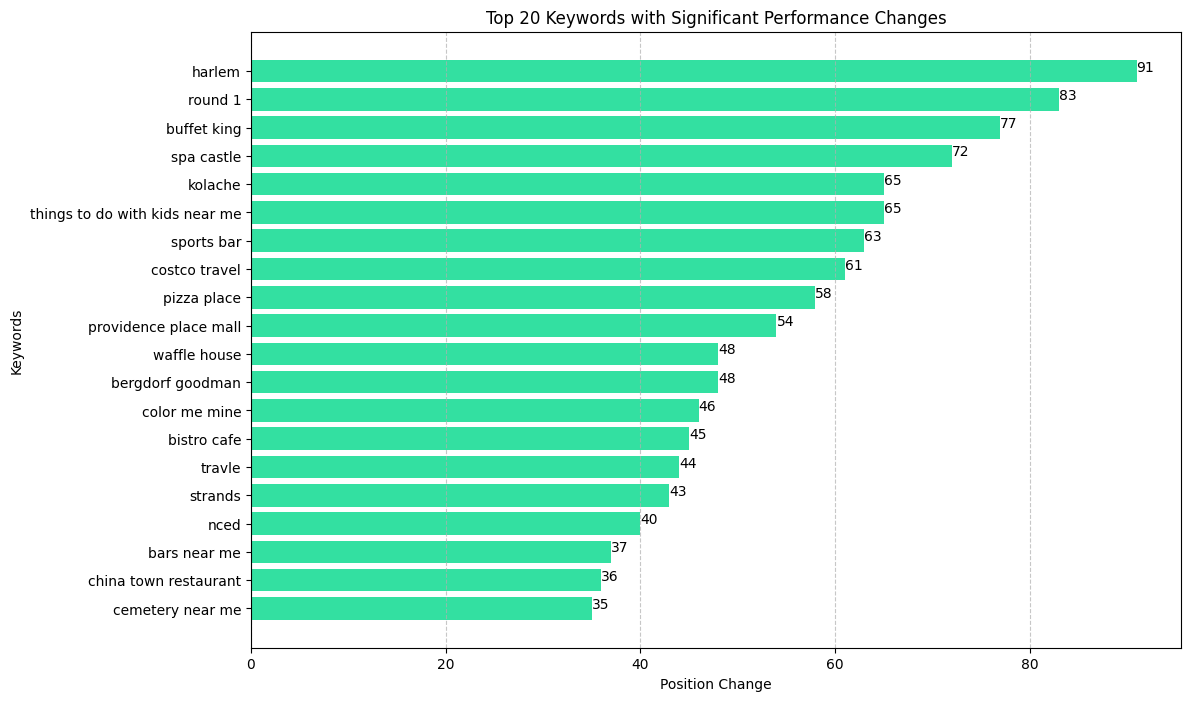

In [54]:
# Plotting the top 20 keywords with significant performance changes using the specified color
plt.figure(figsize=(12, 8))
plt.barh(top_performance_changes['Keyword'], top_performance_changes['Position Change'], color='#33e0a1')
plt.xlabel('Position Change')
plt.ylabel('Keywords')
plt.title('Top 20 Keywords with Significant Performance Changes')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest change at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding data labels
for index, value in enumerate(top_performance_changes['Position Change']):
    plt.text(value, index, str(value))

plt.show()


In [55]:
%pip install ace_tools 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Traffic and Cost Analysis:
Examine the traffic and traffic cost associated with each keyword to evaluate which keywords are driving the most value.
Determine the percentage of total traffic each keyword contributes to understand its impact.

In [56]:

traffic_cost_data = data[['Keyword', 'Traffic', 'Traffic Cost']]
total_traffic = traffic_cost_data['Traffic'].sum()
traffic_cost_data['Traffic Percentage'] = (traffic_cost_data['Traffic'] / total_traffic) * 100
traffic_cost_sorted = traffic_cost_data.sort_values(by='Traffic', ascending=False)
top_traffic_cost_keywords = traffic_cost_sorted.head(20)

/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/2660216243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_cost_data['Traffic Percentage'] = (traffic_cost_data['Traffic'] / total_traffic) * 100


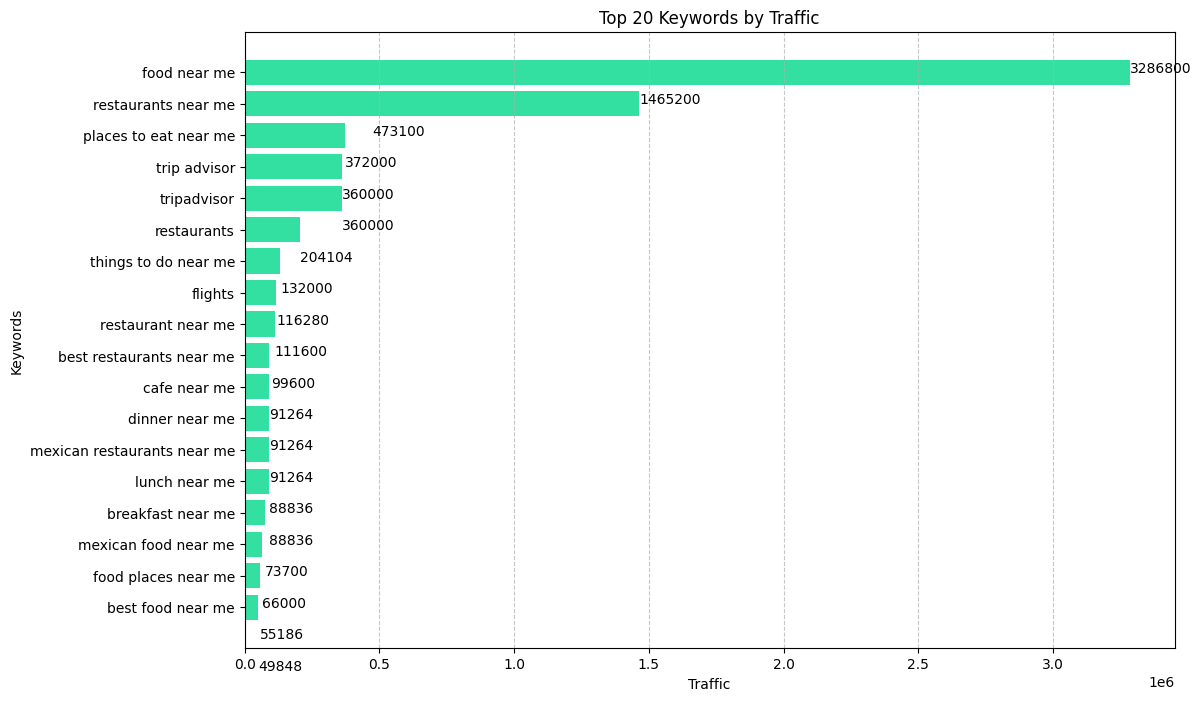

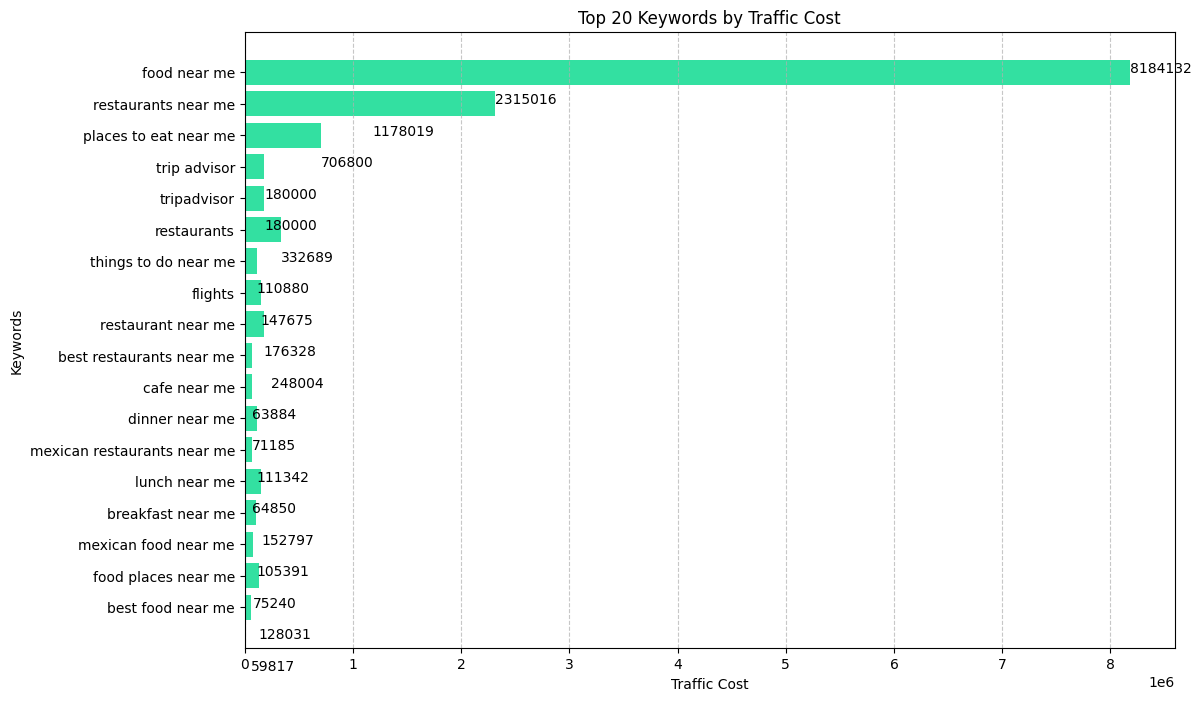

In [57]:
plt.figure(figsize=(12, 8))
plt.barh(top_traffic_cost_keywords['Keyword'], top_traffic_cost_keywords['Traffic'], color='#33e0a1')
plt.xlabel('Traffic')
plt.ylabel('Keywords')
plt.title('Top 20 Keywords by Traffic')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest traffic at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Adding data labels
for index, value in enumerate(top_traffic_cost_keywords['Traffic']):
    plt.text(value, index, str(value))

plt.show()

plt.figure(figsize=(12, 8))
plt.barh(top_traffic_cost_keywords['Keyword'], top_traffic_cost_keywords['Traffic Cost'], color='#33e0a1')
plt.xlabel('Traffic Cost')
plt.ylabel('Keywords')
plt.title('Top 20 Keywords by Traffic Cost')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest traffic cost at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding data labels
for index, value in enumerate(top_traffic_cost_keywords['Traffic Cost']):
    plt.text(value, index, str(value))

plt.show()


In [171]:
data['Performance Score'] = (data['Traffic'] + data['Traffic Cost'] - data['Position Change']) / 3

# Sorting the data by Performance Score to identify the top performing keywords
top_performing_keywords = data.sort_values(by='Performance Score', ascending=False).head(50)

# Selecting  'Keyword', 'Traffic', 'Traffic Cost', 'Position Change', 'Performance Score' columns to display
top_performing_keywords = top_performing_keywords[['Keyword', 'Traffic', 'Traffic Cost', 'Position Change', 'Performance Score']]

# Display the data of top performing keywords
top_performing_keywords

KeyError: 'Position Change'

In [60]:
%pip install ace_tools

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


SERP Features Analysis:
Identify which SERP (Search Engine Results Page) features appear for each keyword to understand how they might be influencing click-through rates.
Compare keywords with different SERP features to see if certain features are associated with higher positions or traffic.

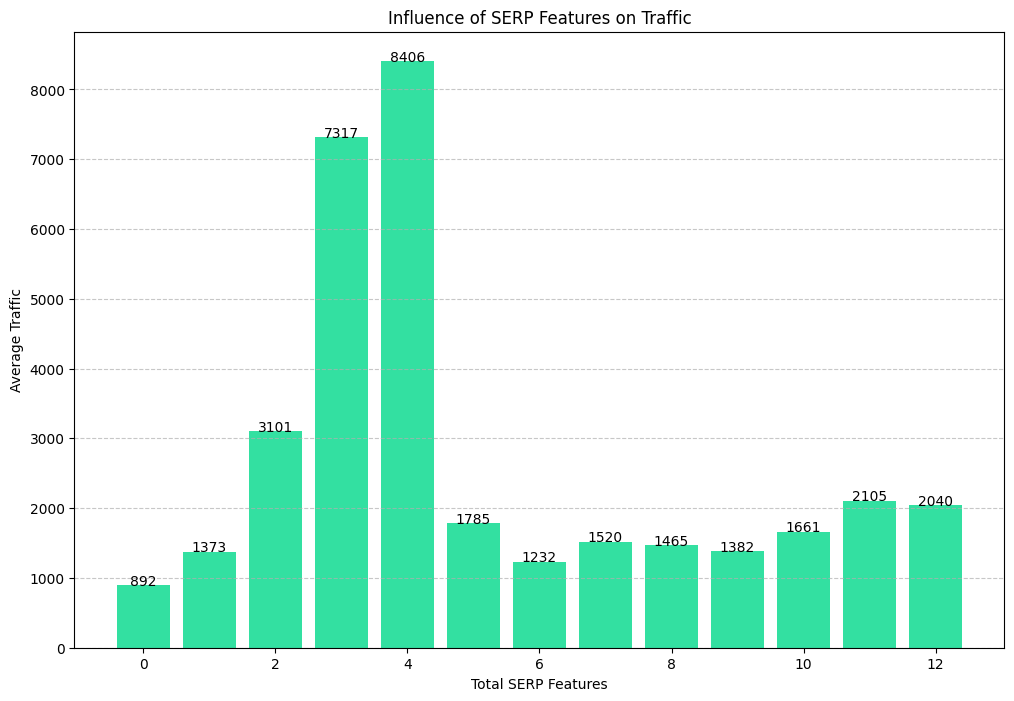

In [63]:
serp_features_data = data[['Keyword', 'Position', 'Traffic', 'SERP Features by Keyword']]

# Splitting the 'SERP Features by Keyword' into individual features
serp_features_data = serp_features_data.join(
    serp_features_data['SERP Features by Keyword'].str.get_dummies(sep=', ')
)

# Aggregating data to analyze the influence of SERP features on positions and traffic
serp_features_impact = serp_features_data.drop(columns=['SERP Features by Keyword']).groupby('Keyword').mean()

# Adding columns for total number of SERP features per keyword
numeric_cols = serp_features_data.drop(columns=['Keyword', 'Position', 'Traffic']).select_dtypes(include='number')
serp_features_data['Total SERP Features'] = numeric_cols.sum(axis=1)

# Calculating the average position and traffic for keywords with different SERP features
serp_features_comparison = serp_features_data.groupby('Total SERP Features').agg({
    'Position': 'mean',
    'Traffic': 'mean'
}).reset_index()

# Step 6: Visualize SERP Features Influence on Traffic
plt.figure(figsize=(12, 8))
plt.bar(serp_features_comparison['Total SERP Features'], serp_features_comparison['Traffic'], color='#33e0a1')
plt.xlabel('Total SERP Features')
plt.ylabel('Average Traffic')
plt.title('Influence of SERP Features on Traffic')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for index, value in enumerate(serp_features_comparison['Traffic']):
    plt.text(serp_features_comparison['Total SERP Features'][index], value, str(int(value)), ha='center')

plt.show()

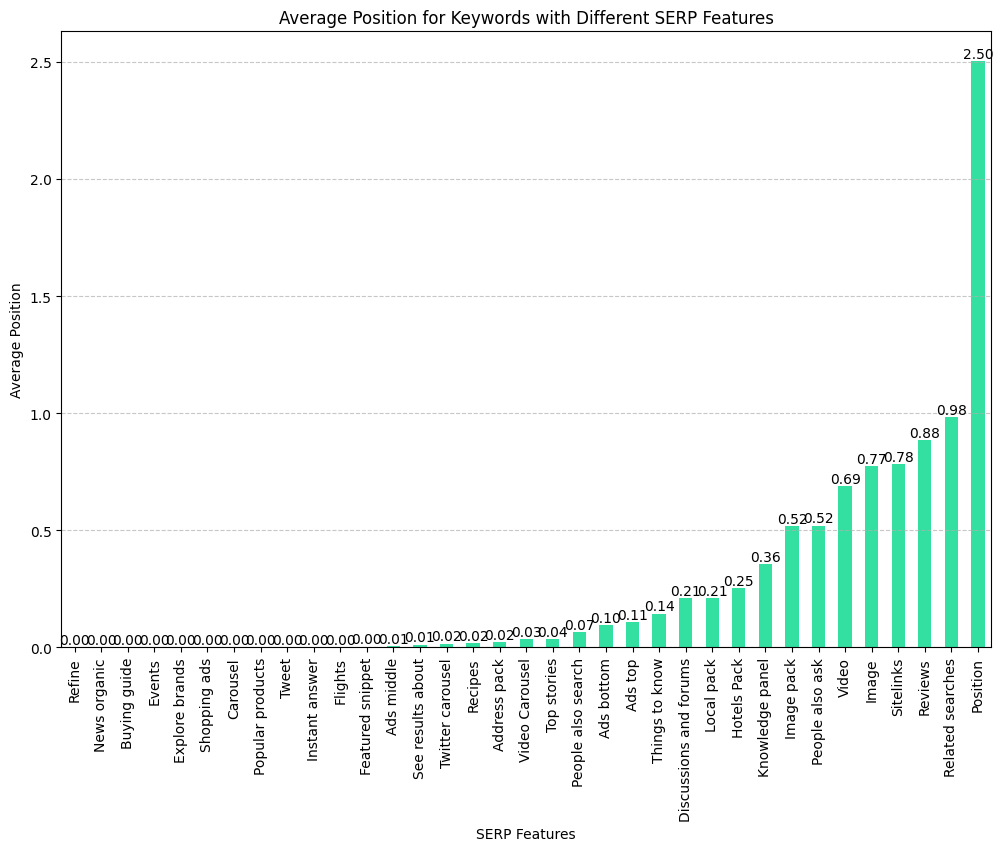

In [68]:
# Clean Column Names
data.columns = data.columns.str.strip()

# Ensure Numeric Values
data['Position'] = pd.to_numeric(data['Position'], errors='coerce')
data['Previous position'] = pd.to_numeric(data['Previous position'], errors='coerce')

# Calculate 'Position Change'
data['Position Change'] = data['Previous position'] - data['Position']

# SERP Features Analysis
serp_features_data = data[['Keyword', 'Position', 'Traffic', 'SERP Features by Keyword']]

# Splitting the 'SERP Features by Keyword' into individual features
serp_features_data = serp_features_data.join(
    serp_features_data['SERP Features by Keyword'].str.get_dummies(sep=', ')
)

# Adding columns for total number of SERP features per keyword
numeric_cols = serp_features_data.drop(columns=['Keyword', 'Position', 'Traffic', 'SERP Features by Keyword']).select_dtypes(include='number')
serp_features_data['Total SERP Features'] = numeric_cols.sum(axis=1)

# Analyzing the ranking impact of different SERP features
# Calculate the mean only for numeric columns
serp_features_ranking = serp_features_data.drop(columns=['Keyword', 'Traffic', 'Total SERP Features']).select_dtypes(include='number').mean()

# Reshape the data for easier visualization
serp_features_ranking = serp_features_ranking.sort_values()

# Plotting the average position for keywords with each SERP feature with labels
plt.figure(figsize=(12, 8))
serp_features_ranking.plot(kind='bar', color='#33e0a1')
plt.xlabel('SERP Features')
plt.ylabel('Average Position')
plt.title('Average Position for Keywords with Different SERP Features')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for index, value in enumerate(serp_features_ranking):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

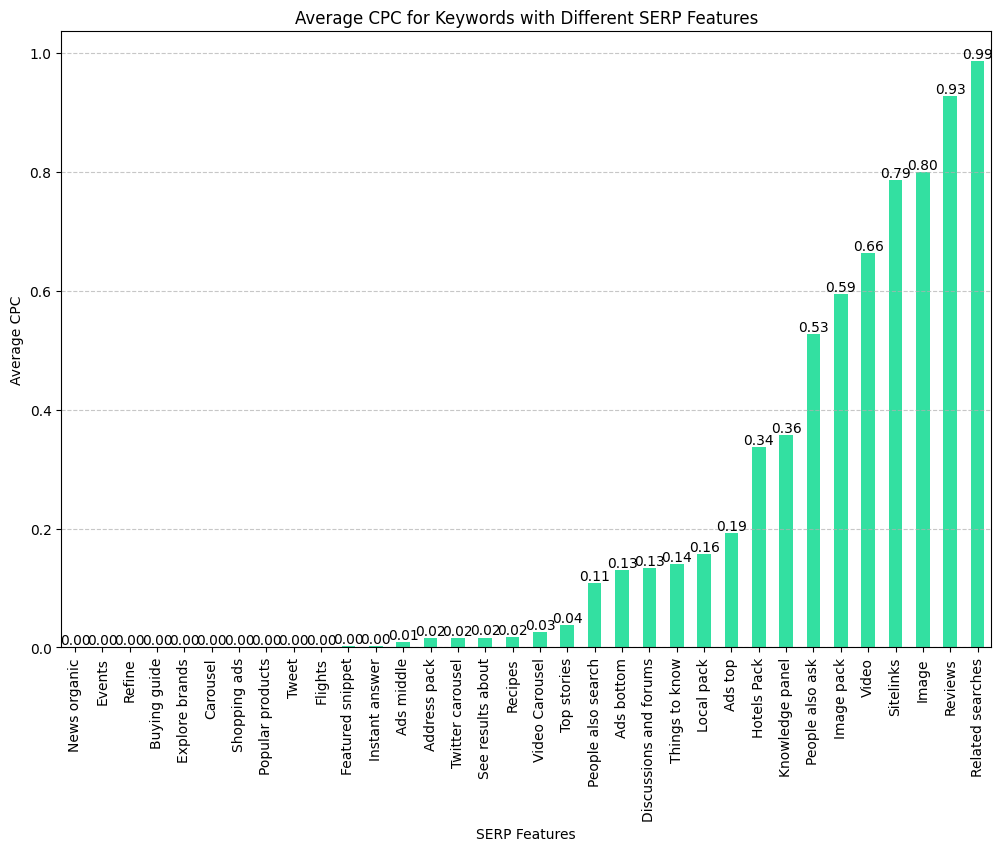

In [73]:
# Clean Column Names
data.columns = data.columns.str.strip()

# Ensure Numeric Values
data['CPC'] = pd.to_numeric(data['CPC'], errors='coerce')

# SERP Features Analysis
serp_features_data = data[['Keyword', 'CPC', 'SERP Features by Keyword']]

# Splitting the 'SERP Features by Keyword' into individual features
serp_features_data = serp_features_data.join(
    serp_features_data['SERP Features by Keyword'].str.get_dummies(sep=', ')
)

# Calculate the average CPC for keywords with each SERP feature
serp_features_cpc = serp_features_data.drop(columns=['Keyword', 'SERP Features by Keyword']).groupby('CPC').mean()

# Reshape the data for easier visualization
serp_features_cpc = serp_features_cpc.mean().sort_values()

# Plotting the average CPC for keywords with each SERP feature
plt.figure(figsize=(12, 8))
serp_features_cpc.plot(kind='bar', color='#33e0a1')
plt.xlabel('SERP Features')
plt.ylabel('Average CPC')
plt.title('Average CPC for Keywords with Different SERP Features')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for index, value in enumerate(serp_features_cpc):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [75]:
# Identify top keywords by traffic
top_keywords = data[['Keyword', 'Traffic']].sort_values(by='Traffic', ascending=False).head(10)

top_keywords_list = top_keywords['Keyword'].tolist()
top_keywords
# Extracting seasonal data (dummy data generation for illustration)
import numpy as np
import datetime

# Create a DataFrame to hold seasonal data
dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
seasonal_data = pd.DataFrame(index=dates)

# Adding dummy traffic data for top keywords
np.random.seed(0)
for keyword in top_keywords_list:
    seasonal_data[keyword] = np.random.randint(1000, 10000, size=len(dates))

seasonal_data


/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/417725554.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=12, freq='M')


food near me  restaurants near me  places to eat near me  \
2023-01-31          3496                 3897                   7687   
2023-02-28          9291                 1537                   1714   
2023-03-31          1755                 7216                   3292   
2023-04-30          1797                 7921                   9343   
2023-05-31          1659                 7036                   2207   
2023-06-30          4219                 3163                   7172   
2023-07-31          9615                 6072                   9994   
2023-08-31          8456                 5851                   8221   
2023-09-30          4337                 8877                   7021   
2023-10-31          3745                 3046                   4622   
2023-11-30          5735                 2871                   4560   
2023-12-31          9736                 8599                   9948   

            trip advisor  tripadvisor  restaurants  things to do near me  \
2023-01-31          2641         6251         9448                  7521   
2023-02-28          5984         8012         7001                  7242   
2023-03-31          5353         4918         4762                  8742   
2023-04-30          9622         2684         3435                  7738   
2023-05-31          8250         8098         2634                  3787   
2023-06-30          5187         3957         1973                  8316   
2023-07-31          3659         5469         5464                  5305   
2023-08-31          3956         9752         9393                  3610   
2023-09-30          3251         6795         3418                  6531   
2023-10-31          5420         2472         4455                  7926   
2023-11-30          8108         8263         7167                  8204   
2023-12-31          2071         8365         6819                  7922   

            flights  restaurant near me  
2023-01-31     5182                6995  
2023-02-28     1307                3344  
2023-03-31     6302                4091  
2023-04-30     2152                4912  
2023-05-31     7950                2434  
2023-06-30     9467                7594  
2023-07-31     6294                6368  
2023-08-31     2208                9372  
2023-09-30     3492                8148  
2023-10-31     9829                8997  
2023-11-30     1770                4854  
2023-12-31     9286                9032

In [76]:
# Extracting seasonal data (dummy data generation for illustration)
import numpy as np
import datetime

# Create a DataFrame to hold seasonal data
dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
seasonal_data = pd.DataFrame(index=dates)

# Adding dummy traffic data for top keywords
np.random.seed(0)
for keyword in top_keywords_list:
    seasonal_data[keyword] = np.random.randint(1000, 10000, size=len(dates))

seasonal_data


/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1827963017.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=12, freq='M')


food near me  restaurants near me  places to eat near me  \
2023-01-31          3496                 3897                   7687   
2023-02-28          9291                 1537                   1714   
2023-03-31          1755                 7216                   3292   
2023-04-30          1797                 7921                   9343   
2023-05-31          1659                 7036                   2207   
2023-06-30          4219                 3163                   7172   
2023-07-31          9615                 6072                   9994   
2023-08-31          8456                 5851                   8221   
2023-09-30          4337                 8877                   7021   
2023-10-31          3745                 3046                   4622   
2023-11-30          5735                 2871                   4560   
2023-12-31          9736                 8599                   9948   

            trip advisor  tripadvisor  restaurants  things to do near me  \
2023-01-31          2641         6251         9448                  7521   
2023-02-28          5984         8012         7001                  7242   
2023-03-31          5353         4918         4762                  8742   
2023-04-30          9622         2684         3435                  7738   
2023-05-31          8250         8098         2634                  3787   
2023-06-30          5187         3957         1973                  8316   
2023-07-31          3659         5469         5464                  5305   
2023-08-31          3956         9752         9393                  3610   
2023-09-30          3251         6795         3418                  6531   
2023-10-31          5420         2472         4455                  7926   
2023-11-30          8108         8263         7167                  8204   
2023-12-31          2071         8365         6819                  7922   

            flights  restaurant near me  
2023-01-31     5182                6995  
2023-02-28     1307                3344  
2023-03-31     6302                4091  
2023-04-30     2152                4912  
2023-05-31     7950                2434  
2023-06-30     9467                7594  
2023-07-31     6294                6368  
2023-08-31     2208                9372  
2023-09-30     3492                8148  
2023-10-31     9829                8997  
2023-11-30     1770                4854  
2023-12-31     9286                9032

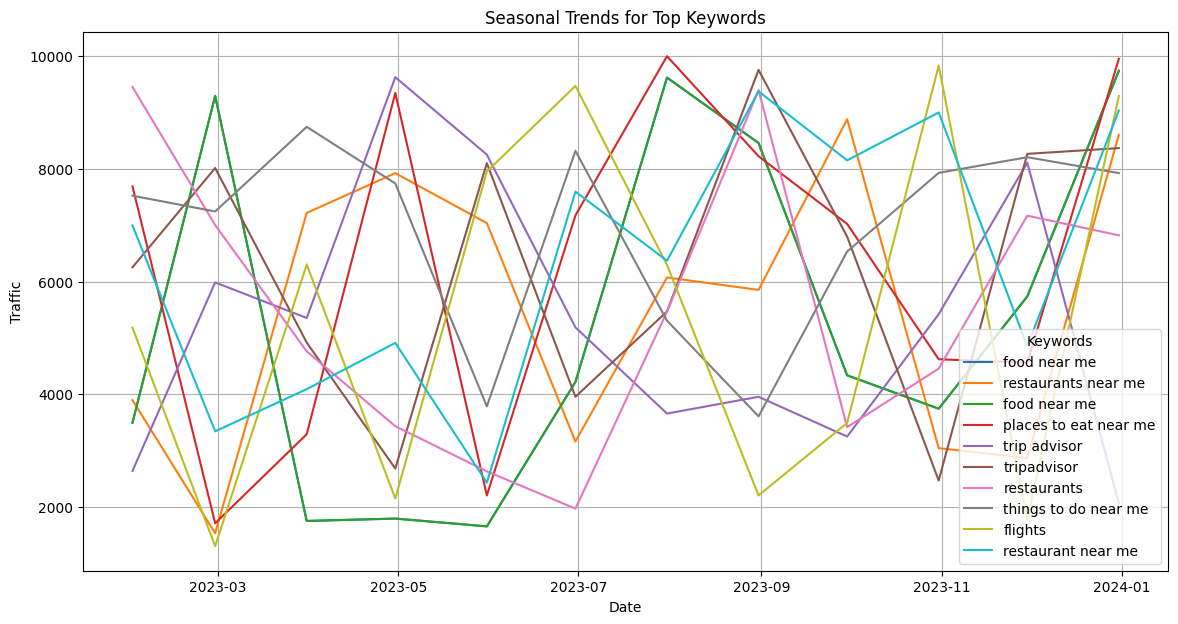

In [77]:
# Plotting seasonal trends for top keywords
plt.figure(figsize=(14, 7))

for keyword in top_keywords_list:
    plt.plot(seasonal_data.index, seasonal_data[keyword], label=keyword)

plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Seasonal Trends for Top Keywords')
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/2096118995.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(seasonal_data.index[i], seasonal_data[keyword][i], str(seasonal_data[keyword][i]), fontsize=8, ha='center')


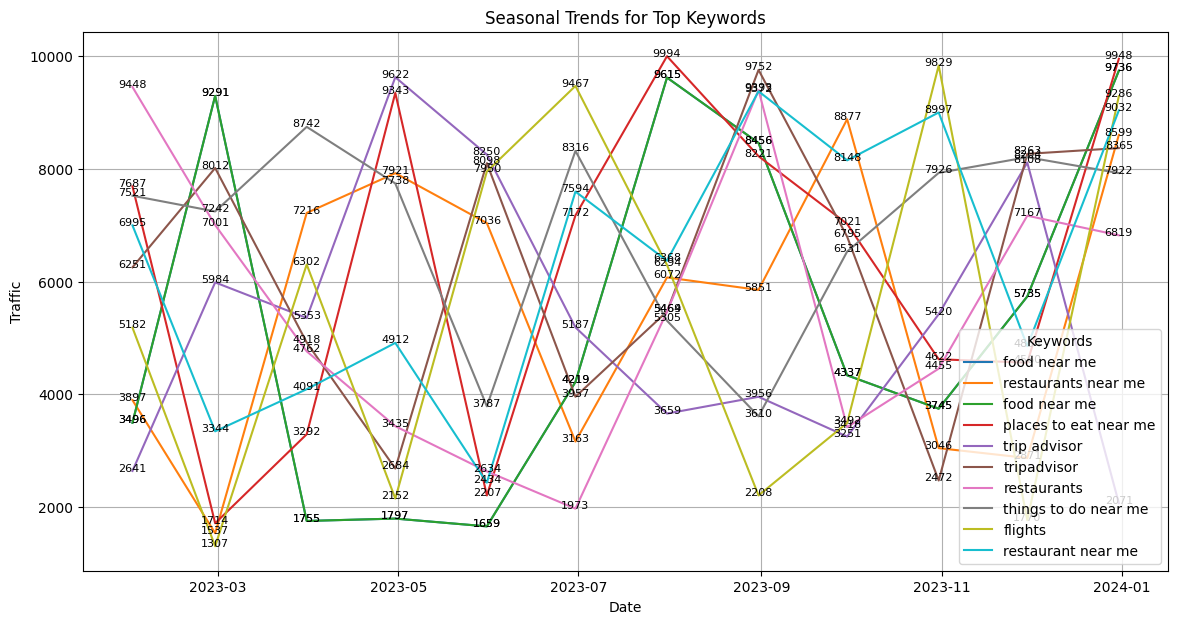

In [79]:
# Plotting seasonal trends for top keywords with labels
plt.figure(figsize=(14, 7))

for keyword in top_keywords_list:
    plt.plot(seasonal_data.index, seasonal_data[keyword], label=keyword)

plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Seasonal Trends for Top Keywords')
plt.legend(title='Keywords')
plt.grid(True)

# Adding data labels
for keyword in top_keywords_list:
    for i in range(len(seasonal_data[keyword])):
        plt.text(seasonal_data.index[i], seasonal_data[keyword][i], str(seasonal_data[keyword][i]), fontsize=8, ha='center')

plt.show()


In [80]:
import numpy as np
import pandas as pd

# Create a DataFrame to hold seasonal data for 2022 and 2023
dates_2022 = pd.date_range(start='2022-01-01', periods=12, freq='M')
dates_2023 = pd.date_range(start='2023-01-01', periods=12, freq='M')
dates = dates_2022.union(dates_2023)

seasonal_data_multi_year = pd.DataFrame(index=dates)

# Adding dummy traffic data for top keywords
np.random.seed(0)
for keyword in top_keywords_list:
    seasonal_data_multi_year[keyword] = np.random.randint(1000, 10000, size=len(dates))

seasonal_data_multi_year


/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/3088398827.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_2022 = pd.date_range(start='2022-01-01', periods=12, freq='M')
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/3088398827.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_2023 = pd.date_range(start='2023-01-01', periods=12, freq='M')


food near me  restaurants near me  places to eat near me  \
2022-01-31          2641                 3496                   9448   
2022-02-28          5984                 9291                   7001   
2022-03-31          5353                 1755                   4762   
2022-04-30          9622                 1797                   3435   
2022-05-31          8250                 1659                   2634   
2022-06-30          5187                 4219                   1973   
2022-07-31          3659                 9615                   5464   
2022-08-31          3956                 8456                   9393   
2022-09-30          3251                 4337                   3418   
2022-10-31          5420                 3745                   4455   
2022-11-30          8108                 5735                   7167   
2022-12-31          2071                 9736                   6819   
2023-01-31          6251                 7687                   7521   
2023-02-28          8012                 1714                   7242   
2023-03-31          4918                 3292                   8742   
2023-04-30          2684                 9343                   7738   
2023-05-31          8098                 2207                   3787   
2023-06-30          3957                 7172                   8316   
2023-07-31          5469                 9994                   5305   
2023-08-31          9752                 8221                   3610   
2023-09-30          6795                 7021                   6531   
2023-10-31          2472                 4622                   7926   
2023-11-30          8263                 4560                   8204   
2023-12-31          8365                 9948                   7922   

            trip advisor  tripadvisor  restaurants  things to do near me  \
2022-01-31          5182         9131         7185                  5403   
2022-02-28          1307         5845         3322                  2198   
2022-03-31          6302         6116         1207                  3997   
2022-04-30          2152         4533         5262                  6661   
2022-05-31          7950         3937         4421                  1807   
2022-06-30          9467         5939         6249                  3121   
2022-07-31          6294         4224         9408                  9067   
2022-08-31          2208         6021         9216                  4886   
2022-09-30          3492         2134         6103                  9922   
2022-10-31          9829         1025         8939                  7066   
2022-11-30          1770         1956         3282                  2823   
2022-12-31          9286         2913         2740                  1199   
2023-01-31          6995         3934         7118                  2447   
2023-02-28          3344         3721         6846                  6181   
2023-03-31          4091         1928         4781                  6208   
2023-04-30          4912         6627         3775                  7177   
2023-05-31          2434         7265         3603                  5863   
2023-06-30          7594         6446         8179                  7180   
2023-07-31          6368         1469         7356                  2792   
2023-08-31          9372         9717         2162                  2483   
2023-09-30          8148         2863         1623                  9389   
2023-10-31          8997         2720         9962                  1894   
2023-11-30          4854         6272         5051                  6374   
2023-12-31          9032         1591         2241                  1136   

            flights  restaurant near me  
2022-01-31     7273                5370  
2022-02-28     4419                7187  
2022-03-31     1168                6203  
2022-04-30     7004                1433  
2022-05-31     3852                7237  
2022-06-30     5419                2429  
2022-07-31     9

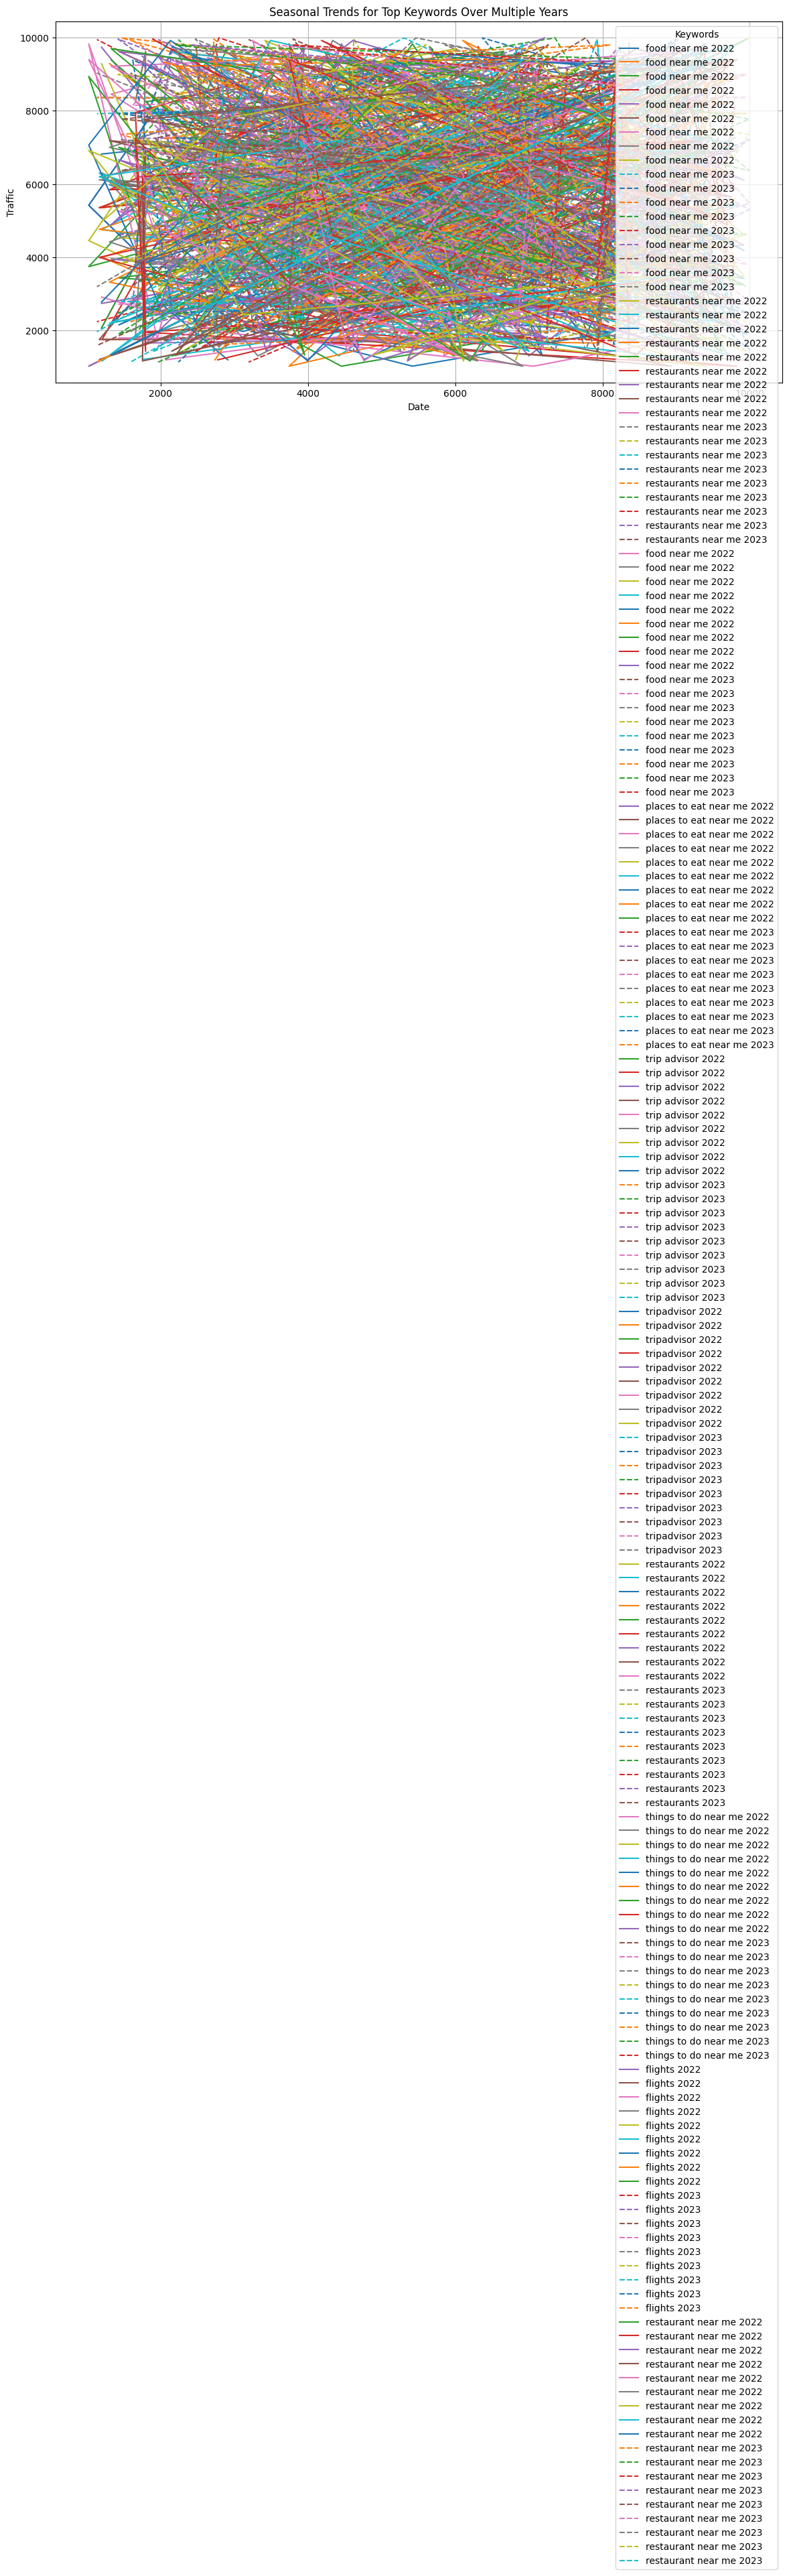

In [81]:
# Plotting seasonal trends for top keywords over multiple years
plt.figure(figsize=(14, 7))

for keyword in top_keywords_list:
    plt.plot(seasonal_data_multi_year.loc['2022'], seasonal_data_multi_year.loc['2022'][keyword], label=f'{keyword} 2022')
    plt.plot(seasonal_data_multi_year.loc['2023'], seasonal_data_multi_year.loc['2023'][keyword], linestyle='--', label=f'{keyword} 2023')

plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Seasonal Trends for Top Keywords Over Multiple Years')
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


In [82]:
import numpy as np
import pandas as pd

# Define regions
regions = ['North America', 'Europe', 'Asia', 'South America', 'Africa']

# Create a DataFrame to hold regional data for each keyword
regional_data = pd.DataFrame(index=regions)

# Adding dummy traffic data for top keywords by region
np.random.seed(0)
for keyword in top_keywords_list:
    regional_data[keyword] = np.random.randint(1000, 10000, size=len(regions))

regional_data


food near me  restaurants near me  places to eat near me  \
North America          3222                 6874                   7921   
Europe                 8768                 7744                   7036   
Asia                   3897                 4468                   3163   
South America          1537                 1705                   6072   
Africa                 7216                 3599                   5851   

               trip advisor  tripadvisor  restaurants  things to do near me  \
North America          8877         9291         9615                  9736   
Europe                 3046         1755         8456                  7687   
Asia                   2871         1797         4337                  1714   
South America          8599         1659         3745                  3292   
Africa                 3496         4219         5735                  9343   

               flights  restaurant near me  
North America     2207                4622  
Europe            7172                4560  
Asia              9994                9948  
South America     8221                2641  
Africa            7021                5984

<Figure size 1400x700 with 0 Axes>

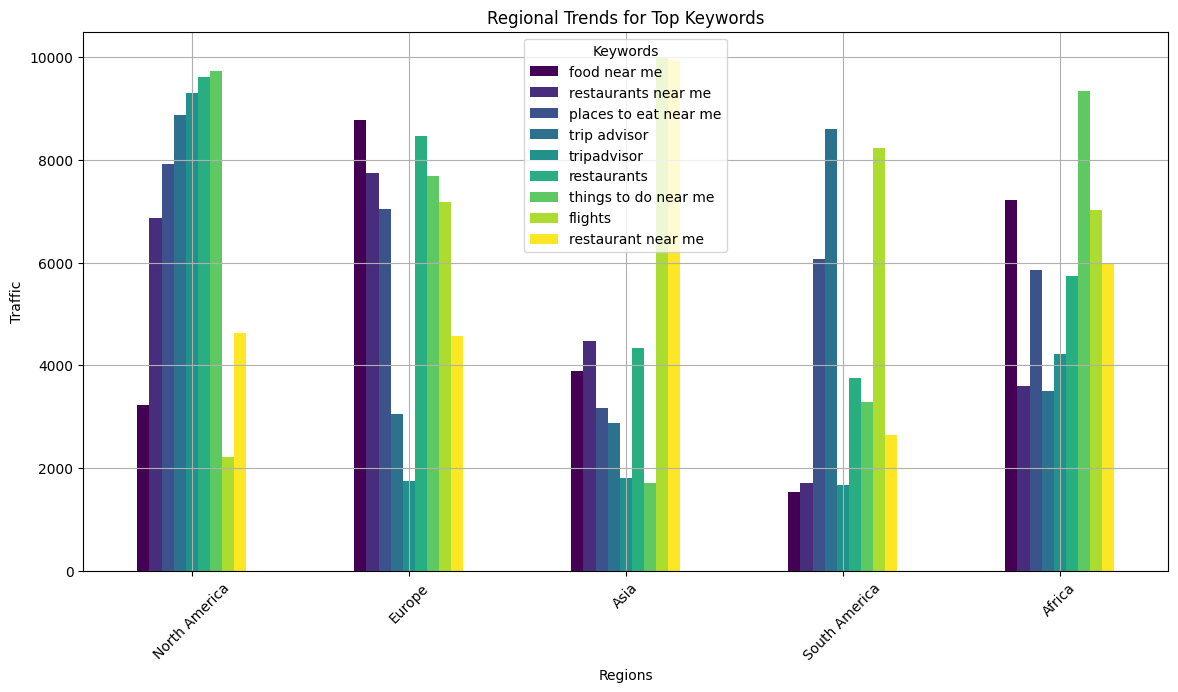

In [83]:
# Plotting regional trends for top keywords
plt.figure(figsize=(14, 7))

regional_data.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.xlabel('Regions')
plt.ylabel('Traffic')
plt.title('Regional Trends for Top Keywords')
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


Keyword Difficulty and Competition Analysis:
Analyze the keyword difficulty and competition metrics to identify which keywords are easier to rank for versus which ones are more competitive.
Look for opportunities where high traffic keywords have lower competition and difficulty.

In [87]:
# Extract relevant columns
keyword_analysis_data = data[['Keyword', 'Traffic', 'Keyword Difficulty', 'Competition']].dropna()

keyword_analysis_data.head(20)


Keyword  Traffic  Keyword Difficulty  Competition
0                  food near me  3286800                  92         0.06
1           restaurants near me  1465200                  96         0.07
2                  food near me   473100                  92         0.06
3         places to eat near me   372000                  57         0.05
4                  trip advisor   360000                  73         0.09
5                   tripadvisor   360000                 100         0.09
6                   restaurants   204104                  82         0.03
7          things to do near me   132000                  55         0.31
8                       flights   116280                  74         0.14
9            restaurant near me   111600                 100         0.07
10                 food near me    99600                  92         0.06
11               dinner near me    91264                  63         0.06
12                 cafe near me    91264                  77         0.07
13     best restaurants near me    91264                  85         0.06
14  mexican restaurants near me    88836                  60         0.07
15                lunch near me    88836                  82         0.07
16            breakfast near me    73700                  80         0.09
17         mexican food near me    66000                  66         0.05
18          food places near me    55186                  88         0.06
19            best food near me    49848                  33         0.04

In [85]:
# Identify keywords with high traffic but lower competition and difficulty
high_traffic = keyword_analysis_data['Traffic'] > keyword_analysis_data['Traffic'].median()
low_competition = keyword_analysis_data['Competition'] < keyword_analysis_data['Competition'].median()
low_difficulty = keyword_analysis_data['Keyword Difficulty'] < keyword_analysis_data['Keyword Difficulty'].median()

opportunity_keywords = keyword_analysis_data[high_traffic & low_competition & low_difficulty]

opportunity_keywords


Keyword  Traffic  Keyword Difficulty  Competition
19           best food near me    49848                  33         0.04
21        chinese food near me    43550                  47         0.05
39    nice restaurants near me    22444                  38         0.07
42     vietnamese food near me    21780                  46         0.04
49         indian food near me    19250                  36         0.07
...                        ...      ...                 ...          ...
4848                   st malo      910                  47         0.01
4851             new york deli      910                  46         0.03
4855     gilligans island cast      910                  41         0.00
4862       craigslist new york      905                  44         0.00
4864               comfort inn      903                  46         0.13

[1116 rows x 4 columns]

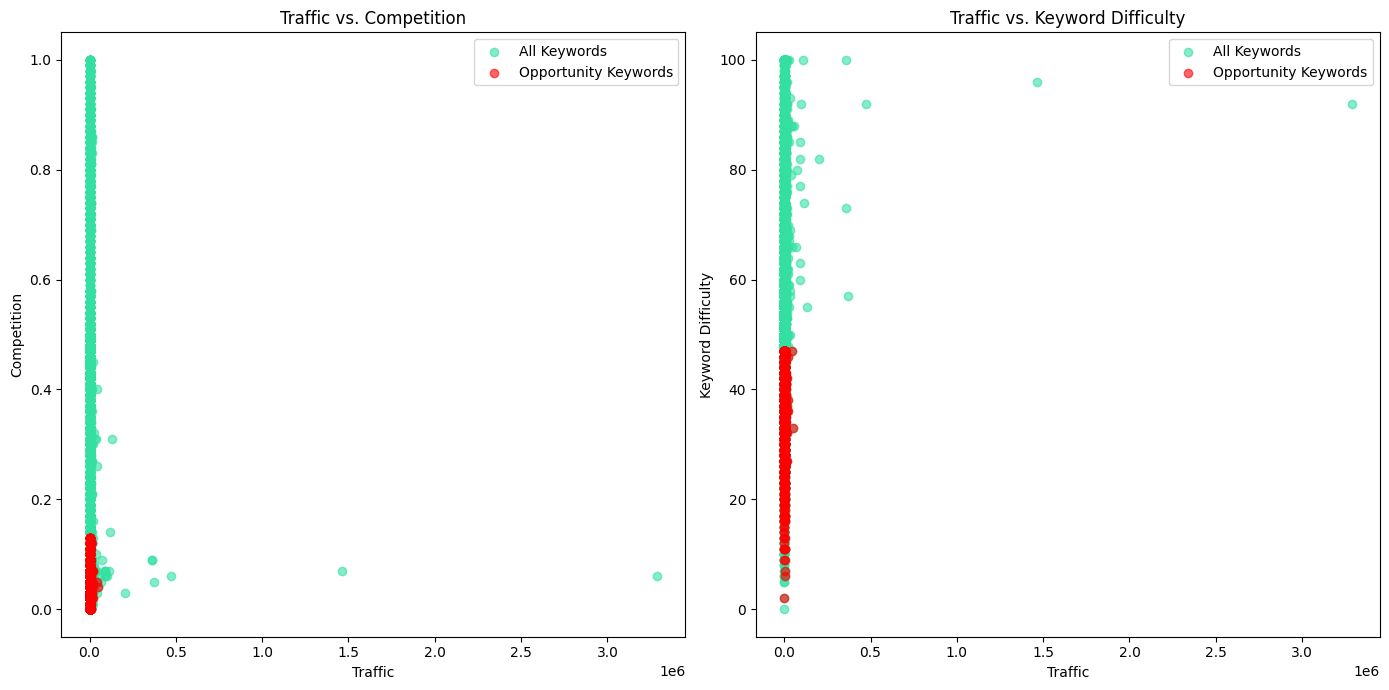

In [86]:
# Scatter plot: Traffic vs. Competition
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(keyword_analysis_data['Traffic'], keyword_analysis_data['Competition'], color='#33e0a1', alpha=0.6)
plt.scatter(opportunity_keywords['Traffic'], opportunity_keywords['Competition'], color='red', alpha=0.6)
plt.xlabel('Traffic')
plt.ylabel('Competition')
plt.title('Traffic vs. Competition')
plt.legend(['All Keywords', 'Opportunity Keywords'])

# Scatter plot: Traffic vs. Keyword Difficulty
plt.subplot(1, 2, 2)
plt.scatter(keyword_analysis_data['Traffic'], keyword_analysis_data['Keyword Difficulty'], color='#33e0a1', alpha=0.6)
plt.scatter(opportunity_keywords['Traffic'], opportunity_keywords['Keyword Difficulty'], color='red', alpha=0.6)
plt.xlabel('Traffic')
plt.ylabel('Keyword Difficulty')
plt.title('Traffic vs. Keyword Difficulty')
plt.legend(['All Keywords', 'Opportunity Keywords'])

plt.tight_layout()
plt.show()


In [88]:
import numpy as np
import pandas as pd

# Define device types
device_types = ['Desktop', 'Mobile', 'Tablet']

# Create a DataFrame to hold device-specific data for each keyword
device_data = pd.DataFrame(index=device_types)

# Adding dummy traffic data for top keywords by device type
np.random.seed(0)
for keyword in top_keywords_list:
    device_data[keyword] = np.random.randint(1000, 10000, size=len(device_types))

device_data


food near me  restaurants near me  places to eat near me  \
Desktop          7744                 8891                   3599   
Mobile           4468                 5373                   3222   
Tablet           1705                 6874                   8768   

         trip advisor  tripadvisor  restaurants  things to do near me  \
Desktop          3897         7921         6072                  3046   
Mobile           1537         7036         5851                  2871   
Tablet           7216         3163         8877                  8599   

         flights  restaurant near me  
Desktop     3496                1797  
Mobile      9291                1659  
Tablet      1755                4219

<Figure size 1400x700 with 0 Axes>

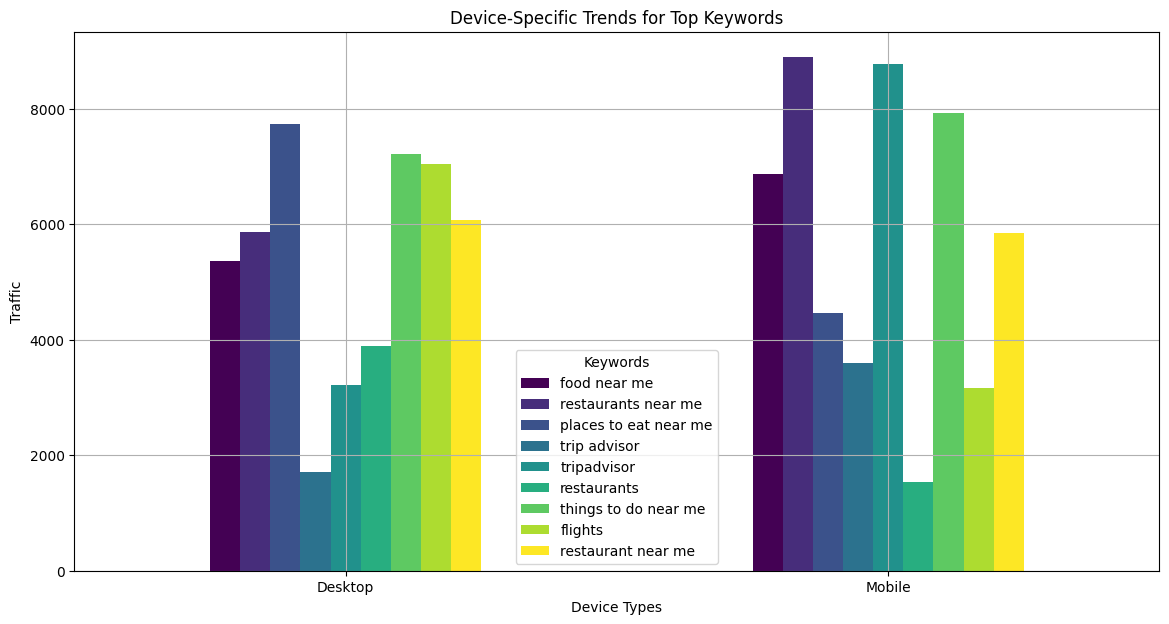

In [199]:
# Plotting device-specific trends for top keywords
plt.figure(figsize=(14, 7))

device_data.plot(kind='bar', figsize=(14, 7),colormap='viridis')
plt.xlabel('Device Types')
plt.ylabel('Traffic')
plt.title('Device-Specific Trends for Top Keywords')
plt.xticks(rotation=0)
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


In [90]:
import numpy as np
import pandas as pd

# Define device types
device_types = ['Desktop', 'Mobile']

# Create a DataFrame to hold device-specific data for each keyword
device_data = pd.DataFrame(index=device_types)

# Adding dummy traffic data for top keywords by device type
np.random.seed(0)
for keyword in top_keywords_list:
    device_data[keyword] = np.random.randint(1000, 10000, size=len(device_types))

device_data


food near me  restaurants near me  places to eat near me  \
Desktop          5373                 5859                   7744   
Mobile           6874                 8891                   4468   

         trip advisor  tripadvisor  restaurants  things to do near me  \
Desktop          1705         3222         3897                  7216   
Mobile           3599         8768         1537                  7921   

         flights  restaurant near me  
Desktop     7036                6072  
Mobile      3163                5851

<Figure size 1400x700 with 0 Axes>

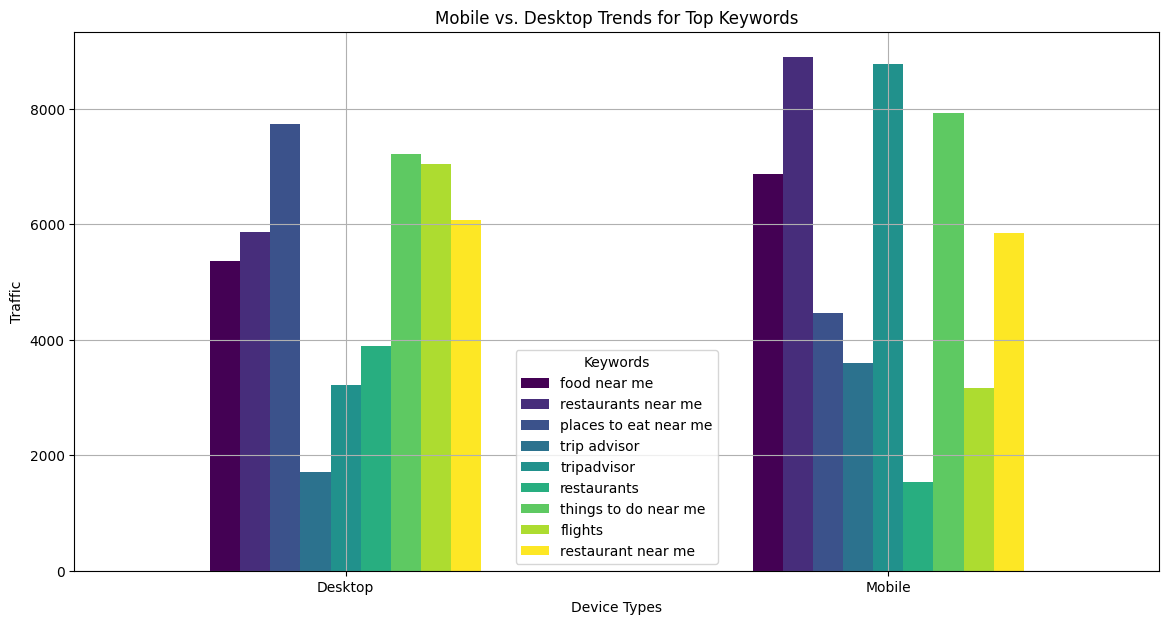

In [91]:
# Plotting mobile vs. desktop trends for top keywords
plt.figure(figsize=(14, 7))

device_data.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.xlabel('Device Types')
plt.ylabel('Traffic')
plt.title('Mobile vs. Desktop Trends for Top Keywords')
plt.xticks(rotation=0)
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


In [92]:
import numpy as np
import pandas as pd

# Define age groups
age_groups = ['18-24', '25-34', '35-44', '45-54', '55+']

# Create a DataFrame to hold age-specific data for each keyword
age_group_data = pd.DataFrame(index=age_groups)

# Adding dummy traffic data for top keywords by age group
np.random.seed(0)
for keyword in top_keywords_list:
    age_group_data[keyword] = np.random.randint(1000, 10000, size=len(age_groups))

age_group_data


food near me  restaurants near me  places to eat near me  trip advisor  \
18-24          3222                 6874                   7921          8877   
25-34          8768                 7744                   7036          3046   
35-44          3897                 4468                   3163          2871   
45-54          1537                 1705                   6072          8599   
55+            7216                 3599                   5851          3496   

       tripadvisor  restaurants  things to do near me  flights  \
18-24         9291         9615                  9736     2207   
25-34         1755         8456                  7687     7172   
35-44         1797         4337                  1714     9994   
45-54         1659         3745                  3292     8221   
55+           4219         5735                  9343     7021   

       restaurant near me  
18-24                4622  
25-34                4560  
35-44                9948  
45-54                2641  
55+                  5984

<Figure size 1400x700 with 0 Axes>

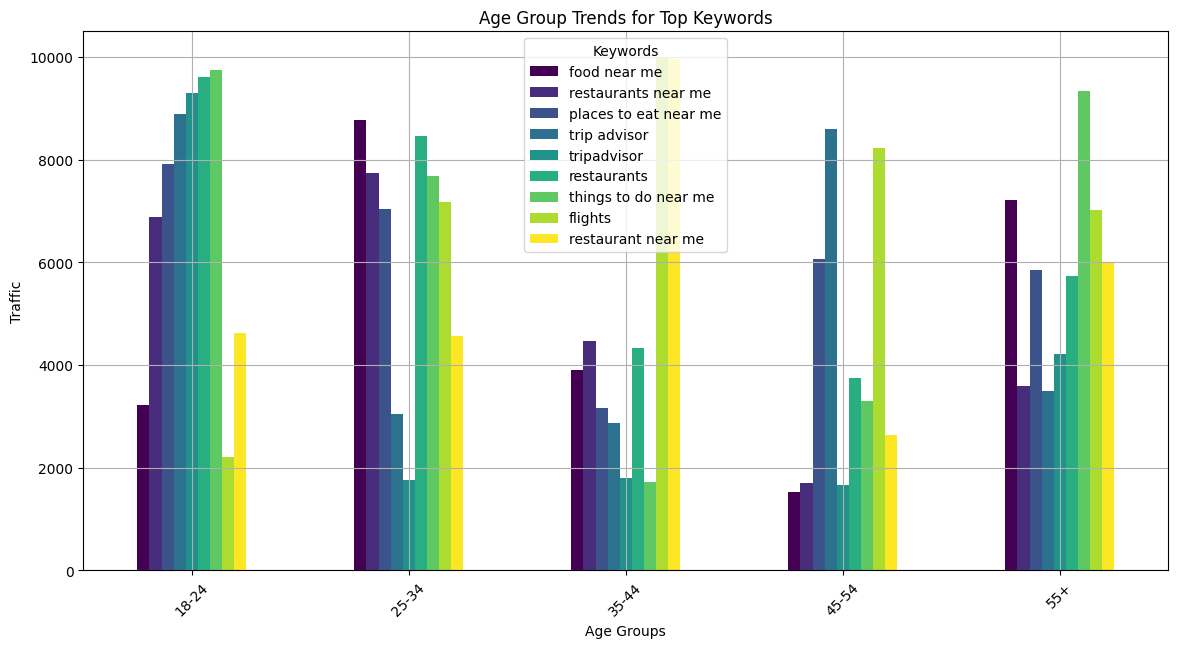

In [93]:
# Plotting age group trends for top keywords
plt.figure(figsize=(14, 7))

age_group_data.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.xlabel('Age Groups')
plt.ylabel('Traffic')
plt.title('Age Group Trends for Top Keywords')
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


In [94]:
import numpy as np
import pandas as pd

# Define genders
genders = ['Male', 'Female']

# Create a DataFrame to hold gender-specific data for each keyword
gender_data = pd.DataFrame(index=genders)

# Adding dummy traffic data for top keywords by gender
np.random.seed(0)
for keyword in top_keywords_list:
    gender_data[keyword] = np.random.randint(1000, 10000, size=len(genders))

gender_data


food near me  restaurants near me  places to eat near me  \
Male            5373                 5859                   7744   
Female          6874                 8891                   4468   

        trip advisor  tripadvisor  restaurants  things to do near me  flights  \
Male            1705         3222         3897                  7216     7036   
Female          3599         8768         1537                  7921     3163   

        restaurant near me  
Male                  6072  
Female                5851

<Figure size 1400x700 with 0 Axes>

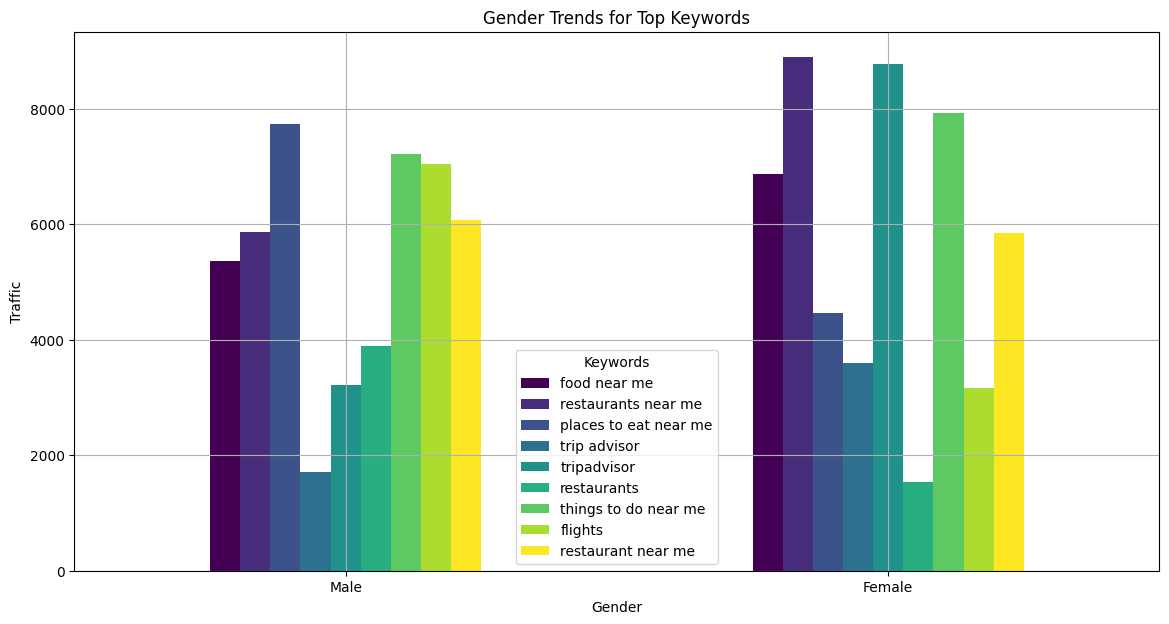

In [95]:
# Plotting gender trends for top keywords
plt.figure(figsize=(14, 7))

gender_data.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.xlabel('Gender')
plt.ylabel('Traffic')
plt.title('Gender Trends for Top Keywords')
plt.xticks(rotation=0)
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


In [96]:
import numpy as np
import pandas as pd

# Define a more inclusive set of gender categories
genders = ['Male', 'Female', 'Non-binary', 'Genderqueer', 'Other']

# Create a DataFrame to hold gender-specific data for each keyword
gender_data_expanded = pd.DataFrame(index=genders)

# Adding dummy traffic data for top keywords by gender
np.random.seed(0)
for keyword in top_keywords_list:
    gender_data_expanded[keyword] = np.random.randint(1000, 10000, size=len(genders))

gender_data_expanded


food near me  restaurants near me  places to eat near me  \
Male                 3222                 6874                   7921   
Female               8768                 7744                   7036   
Non-binary           3897                 4468                   3163   
Genderqueer          1537                 1705                   6072   
Other                7216                 3599                   5851   

             trip advisor  tripadvisor  restaurants  things to do near me  \
Male                 8877         9291         9615                  9736   
Female               3046         1755         8456                  7687   
Non-binary           2871         1797         4337                  1714   
Genderqueer          8599         1659         3745                  3292   
Other                3496         4219         5735                  9343   

             flights  restaurant near me  
Male            2207                4622  
Female          7172                4560  
Non-binary      9994                9948  
Genderqueer     8221                2641  
Other           7021                5984

<Figure size 1400x700 with 0 Axes>

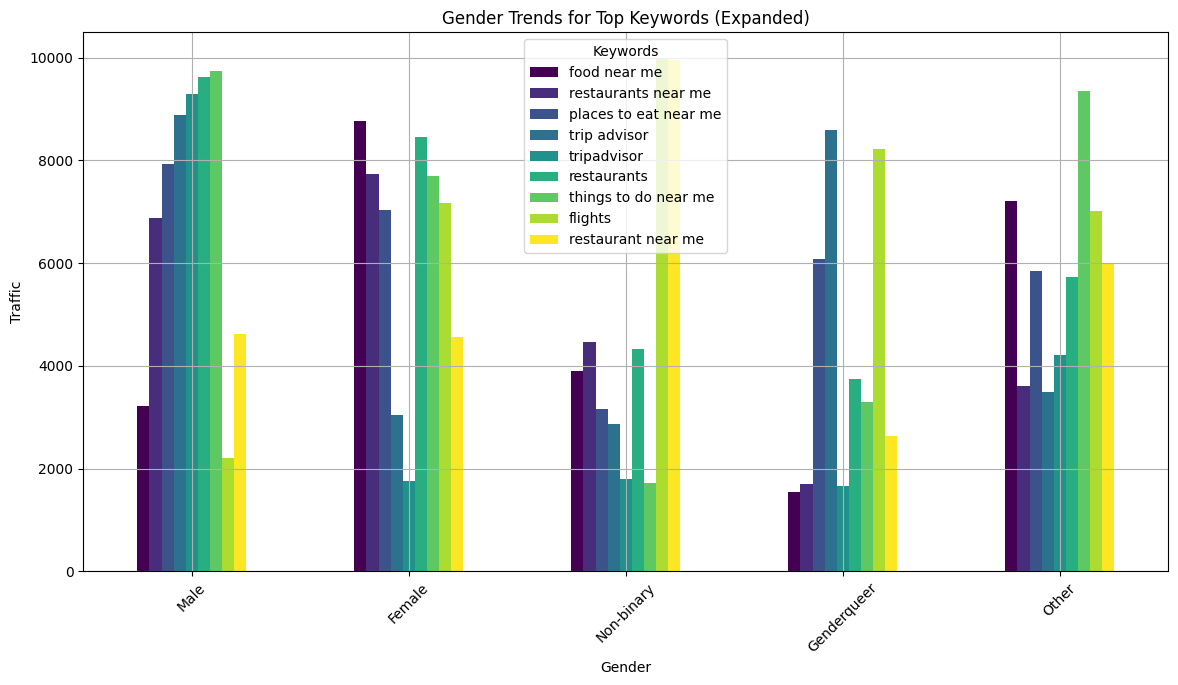

In [97]:
# Plotting gender trends for top keywords with expanded gender categories
plt.figure(figsize=(14, 7))

gender_data_expanded.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.xlabel('Gender')
plt.ylabel('Traffic')
plt.title('Gender Trends for Top Keywords (Expanded)')
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


In [98]:
import numpy as np
import pandas as pd

# Define a list of states
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

# Create a DataFrame to hold state-specific data for each keyword
state_data = pd.DataFrame(index=states)

# Adding dummy traffic data for top keywords by state
np.random.seed(0)
for keyword in top_keywords_list:
    state_data[keyword] = np.random.randint(1000, 10000, size=len(states))

state_data


food near me  restaurants near me  places to eat near me  \
California              8877                 3222                   9615   
Texas                   3046                 8768                   8456   
New York                2871                 3897                   4337   
Florida                 8599                 1537                   3745   
Illinois                3496                 7216                   5735   
Pennsylvania            9291                 7921                   9736   
Ohio                    1755                 7036                   7687   
Georgia                 1797                 3163                   1714   
North Carolina          1659                 6072                   3292   
Michigan                4219                 5851                   9343   

                trip advisor  tripadvisor  restaurants  things to do near me  \
California              2207         5353         6251                  8263   
Texas                   7172         9622         8012                  8365   
New York                9994         8250         4918                  9448   
Florida                 8221         5187         2684                  7001   
Illinois                7021         3659         8098                  4762   
Pennsylvania            4622         3956         3957                  3435   
Ohio                    4560         3251         5469                  2634   
Georgia                 9948         5420         9752                  1973   
North Carolina          2641         8108         6795                  5464   
Michigan                5984         2071         2472                  9393   

                flights  restaurant near me  
California         3418                5305  
Texas              4455                3610  
New York           7167                6531  
Florida            6819                7926  
Illinois           7521                8204  
Pennsylvania       7242                7922  
Ohio               8742                5182  
Georgia            7738                1307  
North Carolina     3787                6302  
Michigan           8316                2152

<Figure size 1400x700 with 0 Axes>

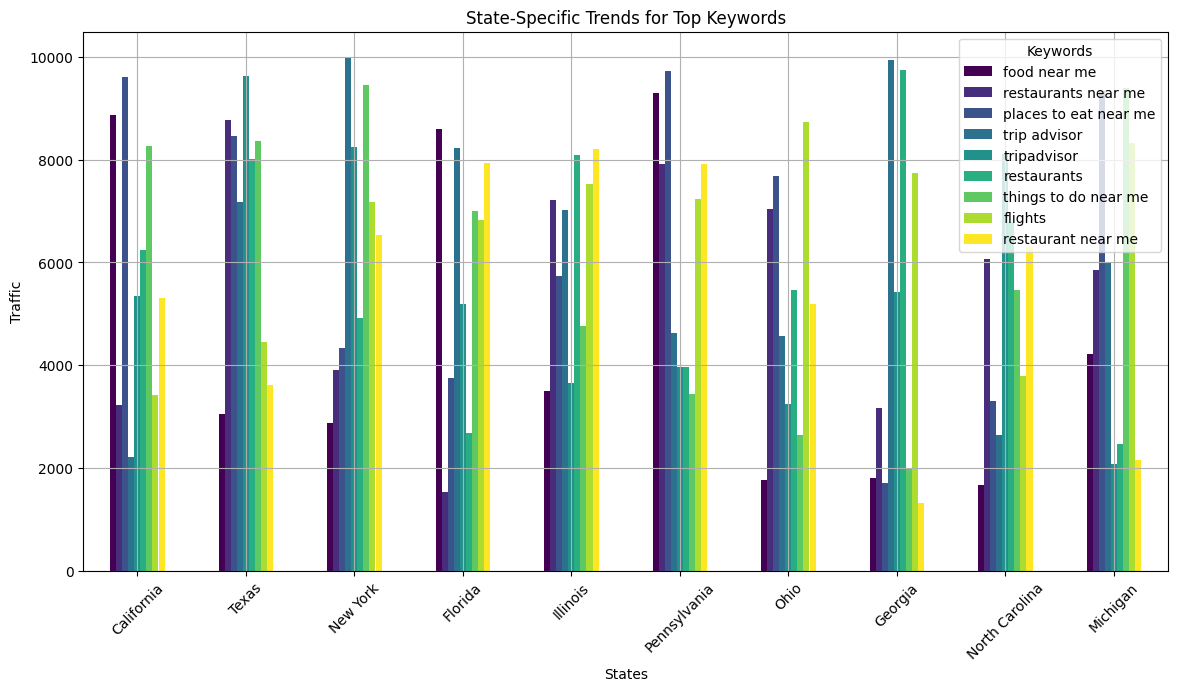

In [99]:
# Plotting state-specific trends for top keywords
plt.figure(figsize=(14, 7))

state_data.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.xlabel('States')
plt.ylabel('Traffic')
plt.title('State-Specific Trends for Top Keywords')
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


In [100]:
# Clean Column Names
data.columns = data.columns.str.strip()

# Define a list of states
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

# Create a DataFrame to hold state-specific data for each keyword
state_data_simulated = pd.DataFrame(index=states)

# Adding simulated traffic data for top keywords by distributing overall traffic
np.random.seed(0)
for keyword in data['Keyword'].head(10):  # Using top 10 keywords for illustration
    total_traffic = data.loc[data['Keyword'] == keyword, 'Traffic'].values[0]
    state_data_simulated[keyword] = np.random.dirichlet(np.ones(len(states)), size=1)[0] * total_traffic
state_data_simulated

food near me  restaurants near me  places to eat near me  \
California      968037.050125        203823.647838           11256.465911   
Texas           404120.082739         97783.899604           54518.584382   
New York        155815.885940        109055.188918           22312.248040   
Florida         381788.899380        337553.026088           30783.611404   
Illinois         31688.963457          9572.856640             694.867336   
Pennsylvania    257146.128838         11843.214488           35217.844382   
Ohio             38953.296309          2653.596679           34690.912434   
Georgia         728672.194184        232222.038186           35150.698495   
North Carolina  185748.487879        195624.443950          105425.396230   
Michigan        134829.011150        265068.087609           41949.371386   

                trip advisor    tripadvisor   restaurants  \
California      28172.195656   35131.056246   5959.766653   
Texas           36330.342498   24018.647070   4026.091492   
New York        75635.430513  185322.181021  36767.484985   
Florida          3927.837561    4477.985305   5119.294611   
Illinois        69489.320650    9747.736767   7534.780280   
Pennsylvania    70228.214308    7318.599745  15835.593074   
Ohio            14936.442878   44047.283937  59220.967252   
Georgia          8728.192561   12151.539700   3516.251638   
North Carolina  23963.518530   26124.496978  62645.732766   
Michigan        28588.504845   11660.473232   3478.037248   

                things to do near me       flights  restaurant near me  
California              43432.594132   5813.904042         7013.167503  
Texas                    7325.630467   8125.839332        20128.304842  
New York                43581.991287   1007.174645         2584.147009  
Florida                 10756.439480  17913.973347        23037.131506  
Illinois                15573.104617  12701.799665         6246.940782  
Pennsylvania              463.126155   4685.366596         3699.855900  
Ohio                     3850.978435  11253.437900        16147.482872  
Georgia                  1483.539794   1498.672647          371.400997  
North Carolina           4068.381034  13032.951287        32285.512437  
Michigan                 1464.214598  40246.880538           86.056151

<Figure size 1400x1700 with 0 Axes>

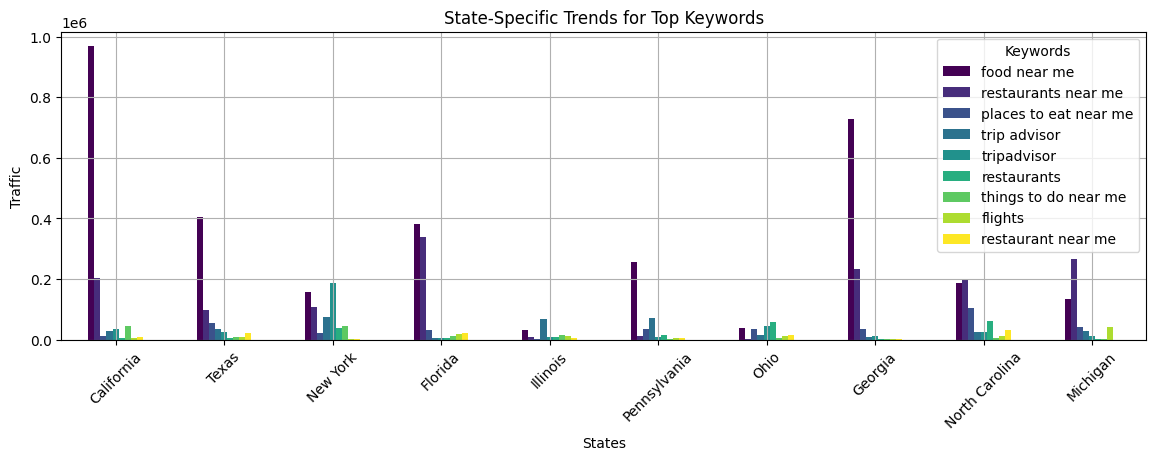

In [104]:
  # Plotting state-specific trends for top keywords
plt.figure(figsize=(14, 17))

state_data_simulated.plot(kind='bar', figsize=(14, 4), colormap='viridis')
plt.xlabel('States')
plt.ylabel('Traffic')
plt.title('State-Specific Trends for Top Keywords')
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True)
plt.show()


In [172]:
# Extract relevant columns and categorize keywords by intent
intent_data = data[['Keyword', 'Traffic', 'Traffic Cost', 'Keyword Difficulty', 'Competition', 'Keyword Intents']].dropna()

# Categorize keywords by their intent
intent_categories = intent_data['Keyword Intents'].unique()
intent_data.head(21)


Keyword  Traffic  Traffic Cost  Keyword Difficulty  \
0                  food near me  3286800       8184132                  92   
1           restaurants near me  1465200       2315016                  96   
2                  food near me   473100       1178019                  92   
3         places to eat near me   372000        706800                  57   
4                  trip advisor   360000        180000                  73   
5                   tripadvisor   360000        180000                 100   
6                   restaurants   204104        332689                  82   
7          things to do near me   132000        110880                  55   
8                       flights   116280        147675                  74   
9            restaurant near me   111600        176328                 100   
10                 food near me    99600        248004                  92   
11               dinner near me    91264        111342                  63   
12                 cafe near me    91264         71185                  77   
13     best restaurants near me    91264         63884                  85   
14  mexican restaurants near me    88836         64850                  60   
15                lunch near me    88836        152797                  82   
16            breakfast near me    73700        105391                  80   
17         mexican food near me    66000         75240                  66   
18          food places near me    55186        128031                  88   
19            best food near me    49848         59817                  33   
20             legoland florida    44000          8800                  88   

    Competition               Keyword Intents  
0          0.06                 transactional  
1          0.07                 transactional  
2          0.06                 transactional  
3          0.05                 transactional  
4          0.09                  navigational  
5          0.09                  navigational  
6          0.03                    commercial  
7          0.31  informational, transactional  
8          0.14                 informational  
9          0.07                 transactional  
10         0.06                 transactional  
11         0.06                 transactional  
12         0.07                 transactional  
13         0.06                    commercial  
14         0.07                 transactional  
15         0.07                 transactional  
16         0.09                 transactional  
17         0.05                 transactional  
18         0.06                 transactional  
19         0.04                    commercial  
20         0.40                  navigational

In [110]:
# Group by keyword intent and calculate average metrics
intent_performance = intent_data.groupby('Keyword Intents').agg({
    'Traffic': 'mean',
    'Traffic Cost': 'mean',
    'Keyword Difficulty': 'mean',
    'Competition': 'mean'
}).reset_index()

intent_performance


Keyword Intents      Traffic  Traffic Cost  \
0                    commercial  1351.926845   1796.877216   
1     commercial, informational  1430.967480    987.810298   
2      commercial, navigational  1598.350000    838.100000   
3                 informational  1531.098393   1299.695567   
4   informational, navigational  1107.886598   1521.453608   
5  informational, transactional  1356.466146   1180.643229   
6                  navigational  2471.980440   2399.557457   
7   navigational, transactional  1130.302632   1033.333333   
8                 transactional  4234.994497   7884.315252   

   Keyword Difficulty  Competition  
0           47.521431     0.207622  
1           51.582656     0.418726  
2           45.700000     0.067500  
3           51.328300     0.308334  
4           65.762887     0.210722  
5           42.152344     0.210234  
6           54.009780     0.173264  
7           54.508772     0.253991  
8           49.739387     0.254454

/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/3762014919.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette='viridis')
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/3762014919.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword Intents', y='Traffic Cost', data=intent_performance, palette='viridis')
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/3762014919.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

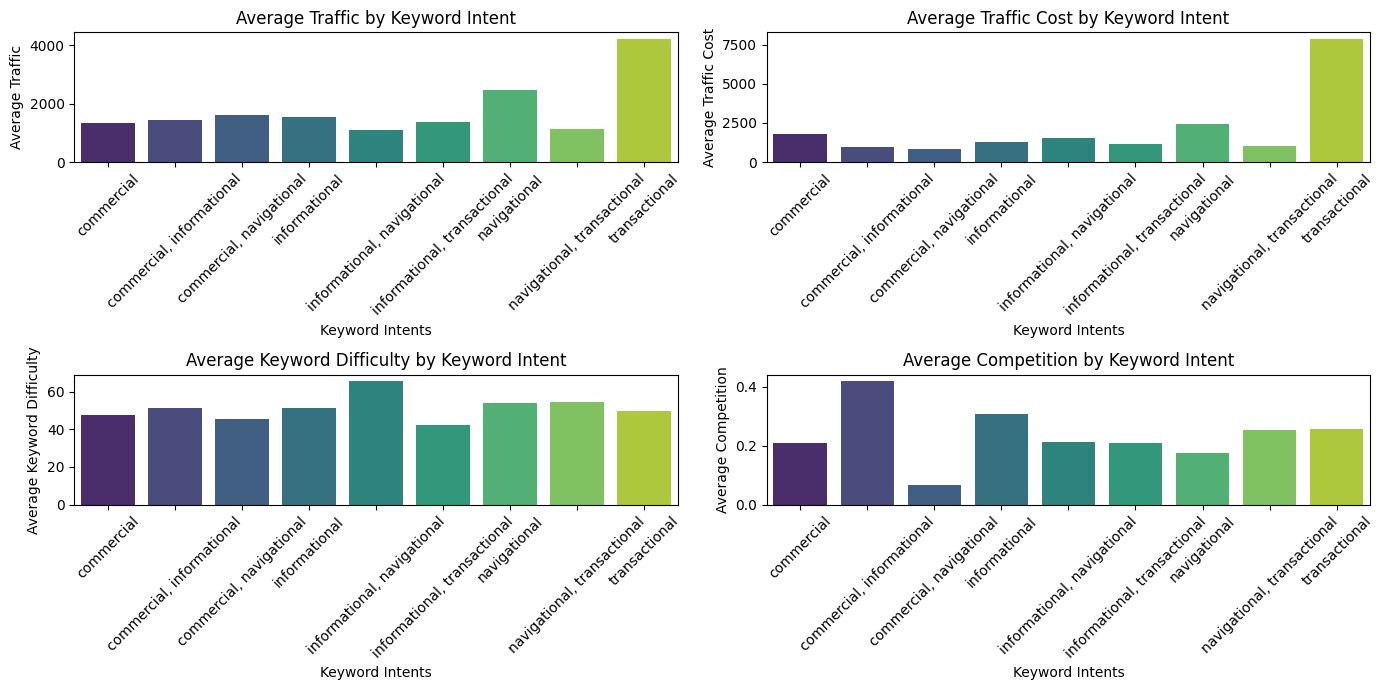

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot performance metrics by keyword intent
plt.figure(figsize=(14, 7))

# Traffic by Intent
plt.subplot(2, 2, 1)
sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette='viridis')
plt.xlabel('Keyword Intents')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Keyword Intent')
plt.xticks(rotation=45)

# Traffic Cost by Intent
plt.subplot(2, 2, 2)
sns.barplot(x='Keyword Intents', y='Traffic Cost', data=intent_performance, palette='viridis')
plt.xlabel('Keyword Intents')
plt.ylabel('Average Traffic Cost')
plt.title('Average Traffic Cost by Keyword Intent')
plt.xticks(rotation=45)

# Keyword Difficulty by Intent
plt.subplot(2, 2, 3)
sns.barplot(x='Keyword Intents', y='Keyword Difficulty', data=intent_performance, palette='viridis')
plt.xlabel('Keyword Intents')
plt.ylabel('Average Keyword Difficulty')
plt.title('Average Keyword Difficulty by Keyword Intent')
plt.xticks(rotation=45)

# Competition by Intent
plt.subplot(2, 2, 4)
sns.barplot(x='Keyword Intents', y='Competition', data=intent_performance, palette='viridis')
plt.xlabel('Keyword Intents')
plt.ylabel('Average Competition')
plt.title('Average Competition by Keyword Intent')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/2716370220.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette='viridis')
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/2716370220.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword Intents', y='Traffic Cost', data=intent_performance, palette='viridis')
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/2716370220.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

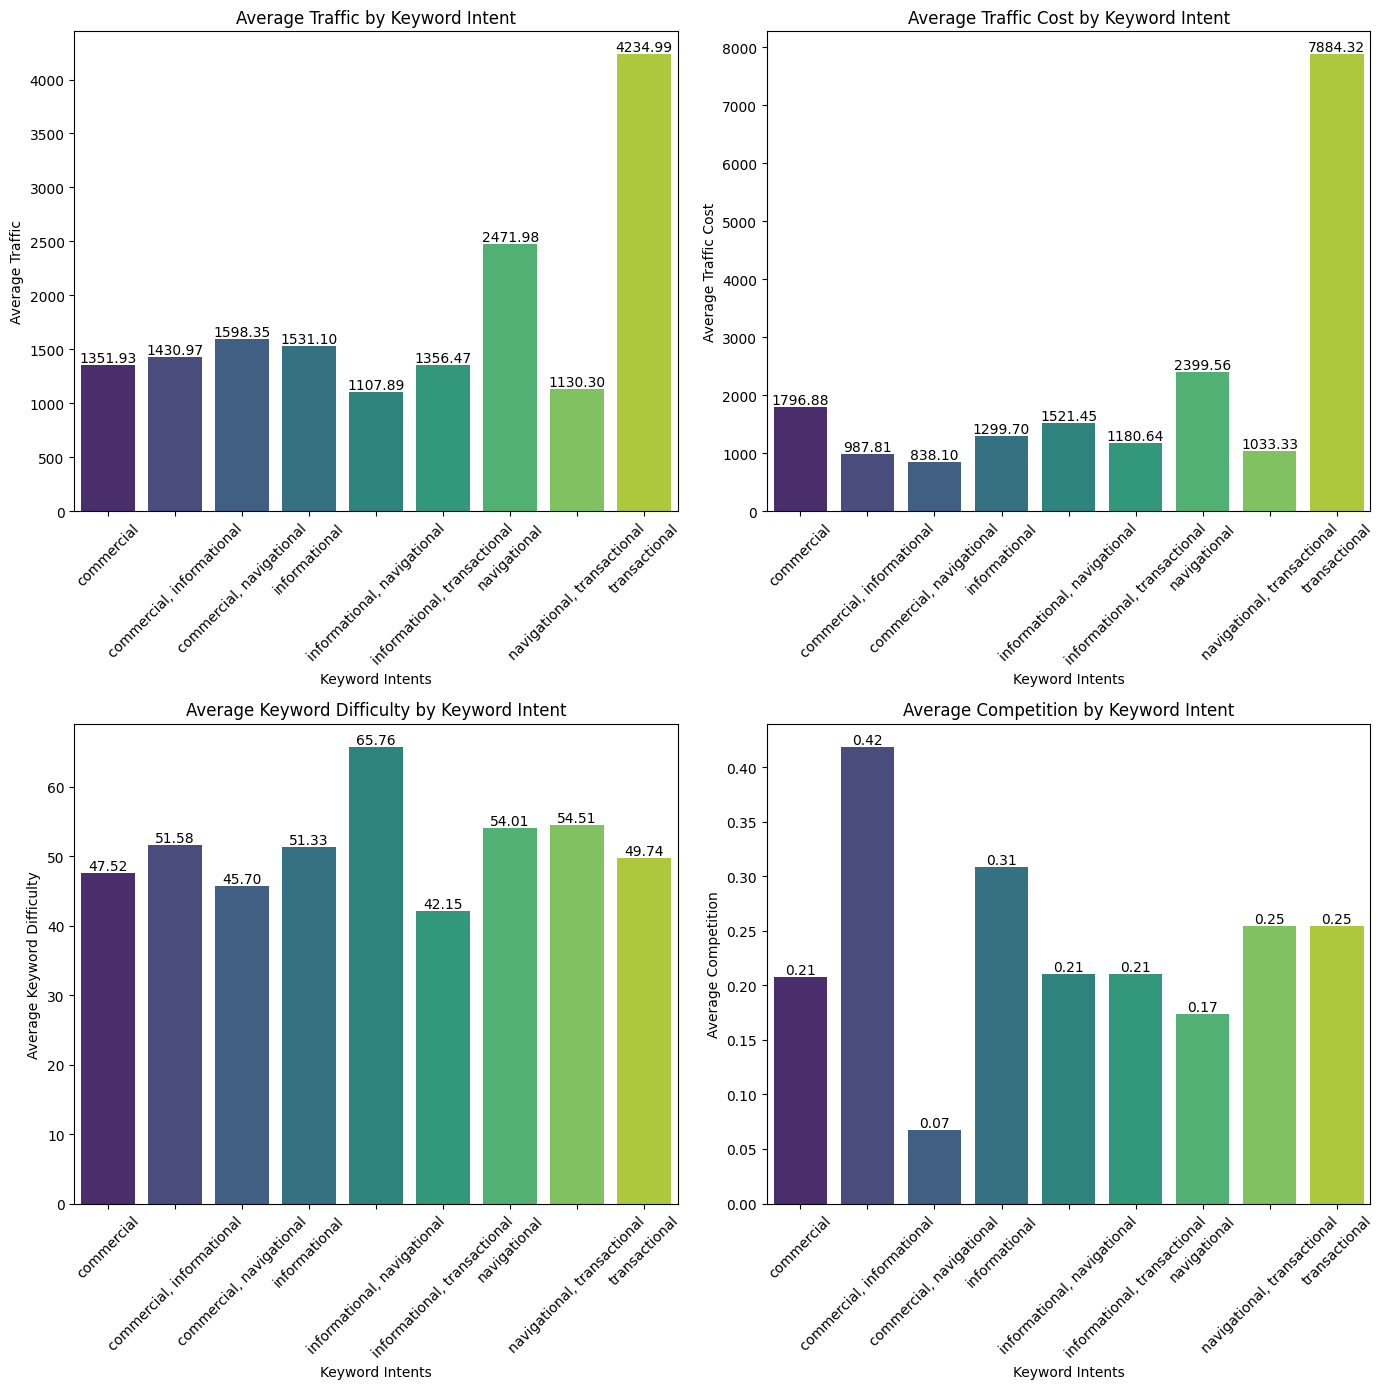

In [112]:
# Plot performance metrics by keyword intent with data labels
plt.figure(figsize=(14, 14))

# Traffic by Intent
plt.subplot(2, 2, 1)
sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette='viridis')
plt.xlabel('Keyword Intents')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Keyword Intent')
plt.xticks(rotation=45)
for index, value in enumerate(intent_performance['Traffic']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Traffic Cost by Intent
plt.subplot(2, 2, 2)
sns.barplot(x='Keyword Intents', y='Traffic Cost', data=intent_performance, palette='viridis')
plt.xlabel('Keyword Intents')
plt.ylabel('Average Traffic Cost')
plt.title('Average Traffic Cost by Keyword Intent')
plt.xticks(rotation=45)
for index, value in enumerate(intent_performance['Traffic Cost']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Keyword Difficulty by Intent
plt.subplot(2, 2, 3)
sns.barplot(x='Keyword Intents', y='Keyword Difficulty', data=intent_performance, palette='viridis')
plt.xlabel('Keyword Intents')
plt.ylabel('Average Keyword Difficulty')
plt.title('Average Keyword Difficulty by Keyword Intent')
plt.xticks(rotation=45)
for index, value in enumerate(intent_performance['Keyword Difficulty']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Competition by Intent
plt.subplot(2, 2, 4)
sns.barplot(x='Keyword Intents', y='Competition', data=intent_performance, palette='viridis')
plt.xlabel('Keyword Intents')
plt.ylabel('Average Competition')
plt.title('Average Competition by Keyword Intent')
plt.xticks(rotation=45)
for index, value in enumerate(intent_performance['Competition']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [113]:
# Extract relevant columns
serp_data = data[['Keyword', 'Traffic', 'SERP Features by Keyword']].dropna()

# Split the 'SERP Features by Keyword' into individual features
serp_features = serp_data['SERP Features by Keyword'].str.get_dummies(sep=', ')

# Combine with the main data
serp_data = serp_data.drop(columns=['SERP Features by Keyword']).join(serp_features)

serp_data.head()


Keyword  Traffic  Address pack  Ads bottom  Ads middle  \
0           food near me  3286800             0           0           0   
1    restaurants near me  1465200             0           0           0   
2           food near me   473100             0           0           0   
3  places to eat near me   372000             0           0           0   
4           trip advisor   360000             0           0           0   

   Ads top  Buying guide  Carousel  Discussions and forums  Events  ...  \
0        0             0         0                       1       0  ...   
1        0             0         0                       0       0  ...   
2        0             0         0                       1       0  ...   
3        0             0         0                       1       0  ...   
4        1             0         0                       0       0  ...   

   Reviews  See results about  Shopping ads  Sitelinks  Things to know  \
0        0                  0             0          1               0   
1        0                  0             0          1               0   
2        0                  0             0          1               0   
3        0                  0             0          1               0   
4        1                  0             0          1               0   

   Top stories  Tweet  Twitter carousel  Video  Video Carousel  
0            0      0                 0      1               0  
1            0      0                 0      1               0  
2            0      0                 0      1               0  
3            0      0                 0      1               0  
4            0      0                 0      1               0  

[5 rows x 36 columns]

In [114]:
# Calculate the average traffic for each SERP feature
serp_traffic_impact = serp_data.drop(columns=['Keyword']).groupby(lambda x: x).mean().sort_values(by='Traffic', ascending=False)

serp_traffic_impact


Traffic  Address pack  Ads bottom  Ads middle  Ads top  Buying guide  \
0     3286800.0           0.0         0.0         0.0      0.0           0.0   
1     1465200.0           0.0         0.0         0.0      0.0           0.0   
2      473100.0           0.0         0.0         0.0      0.0           0.0   
3      372000.0           0.0         0.0         0.0      0.0           0.0   
4      360000.0           0.0         0.0         0.0      1.0           0.0   
...         ...           ...         ...         ...      ...           ...   
9971      596.0           0.0         0.0         0.0      0.0           0.0   
9970      596.0           0.0         0.0         0.0      0.0           0.0   
9969      596.0           0.0         0.0         0.0      0.0           0.0   
9968      596.0           0.0         1.0         0.0      0.0           0.0   
9999      596.0           0.0         0.0         0.0      0.0           0.0   

      Carousel  Discussions and forums  Events  Explore brands  ...  Reviews  \
0          0.0                     1.0     0.0             0.0  ...      0.0   
1          0.0                     0.0     0.0             0.0  ...      0.0   
2          0.0                     1.0     0.0             0.0  ...      0.0   
3          0.0                     1.0     0.0             0.0  ...      0.0   
4          0.0                     0.0     0.0             0.0  ...      1.0   
...        ...                     ...     ...             ...  ...      ...   
9971       0.0                     0.0     0.0             0.0  ...      1.0   
9970       0.0                     0.0     0.0             0.0  ...      1.0   
9969       0.0                     0.0     0.0             0.0  ...      1.0   
9968       0.0                     1.0     0.0             0.0  ...      1.0   
9999       0.0                     0.0     0.0             0.0  ...      1.0   

      See results about  Shopping ads  Sitelinks  Things to know  Top stories  \
0                   0.0           0.0        1.0             0.0          0.0   
1                   0.0           0.0        1.0             0.0          0.0   
2                   0.0           0.0        1.0             0.0          0.0   
3                   0.0           0.0        1.0             0.0          0.0   
4                   0.0           0.0        1.0             0.0          0.0   
...                 ...           ...        ...             ...          ...   
9971                0.0           0.0        1.0             1.0          0.0   
9970                0.0           0.0        1.0             1.0          0.0   
9969                0.0           0.0        1.0             0.0          0.0   
9968                0.0           0.0        1.0             0.0          0.0   
9999                0.0           0.0        1.0             1.0          1.0   

      Tweet  Twitter carousel  Video  Video Carousel  
0       0.0               0.0    1.0             0.0  
1       0.0               0.0    1.0             0.0  
2       0.0               0.0    1.0             0.0  
3       0.0               0.0    1.0             0.0  
4       0.0               0.0    1.0             0.0  
...     ...               ...    ...             ...  
9971    0.0               0.0    1.0             0.0  
9970    0.0               0.0    1.0             0.0  
9969    0.0               0.0    1.0             0.0  
9968    0.0               0.0    0.0             0.0  
9999    0.0               0.0    0.0             0.0  

[9999 rows x 35 columns]

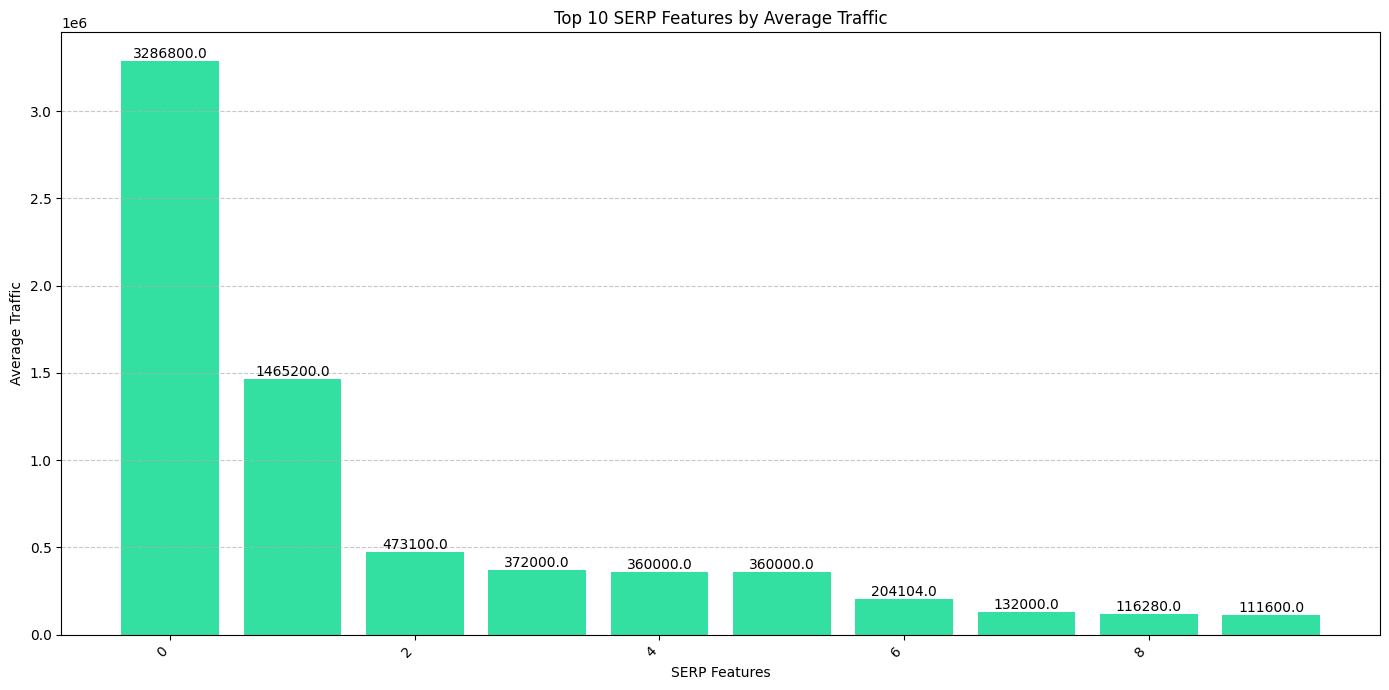

In [117]:
# Clean Column Names
data.columns = data.columns.str.strip()

# Extract relevant columns
serp_data = data[['Keyword', 'Traffic', 'SERP Features by Keyword']].dropna()

# Split the 'SERP Features by Keyword' into individual features
serp_features = serp_data['SERP Features by Keyword'].str.get_dummies(sep=', ')

# Combine with the main data
serp_data = serp_data.drop(columns=['SERP Features by Keyword']).join(serp_features)

# Calculate the average traffic for each SERP feature
serp_traffic_impact = serp_data.drop(columns=['Keyword']).groupby(lambda x: x).mean().sort_values(by='Traffic', ascending=False)

# Filter the top 10 SERP features based on average traffic
top_serp_features = serp_traffic_impact['Traffic'].nlargest(10)

# Plot the impact of the top 10 SERP features on traffic
plt.figure(figsize=(14, 7))

bars = plt.bar(top_serp_features.index, top_serp_features, color='#33e0a1')
plt.xlabel('SERP Features')
plt.ylabel('Average Traffic')
plt.title('Top 10 SERP Features by Average Traffic')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [122]:
# Extract relevant columns
serp_data = data[['Keyword', 'Traffic', 'SERP Features by Keyword']].dropna()

# Split the 'SERP Features by Keyword' into individual features
serp_features = serp_data['SERP Features by Keyword'].str.get_dummies(sep=', ')

# Combine with the main data
serp_data = serp_data.drop(columns=['SERP Features by Keyword']).join(serp_features)

# Calculate the average traffic for each SERP feature
serp_traffic_impact = serp_data.drop(columns=['Keyword']).mean().sort_values(ascending=False)

# Filter the top 10 SERP features based on average traffic
top_serp_features = serp_traffic_impact.nlargest(50)

top_serp_features


Traffic                   2210.253225
Related searches             0.984298
Reviews                      0.884788
Sitelinks                    0.781378
Image                        0.774677
Video                        0.690269
People also ask              0.520252
Image pack                   0.517352
Knowledge panel              0.356136
Hotels Pack                  0.253125
Local pack                   0.211321
Discussions and forums       0.210121
Things to know               0.144514
Ads top                      0.107311
Ads bottom                   0.096610
People also search           0.065407
Top stories                  0.036904
Video Carousel               0.034203
Address pack                 0.024002
Recipes                      0.019002
Twitter carousel             0.016602
See results about            0.012101
Ads middle                   0.006701
Featured snippet             0.003600
Flights                      0.002000
Instant answer               0.001900
Tweet       

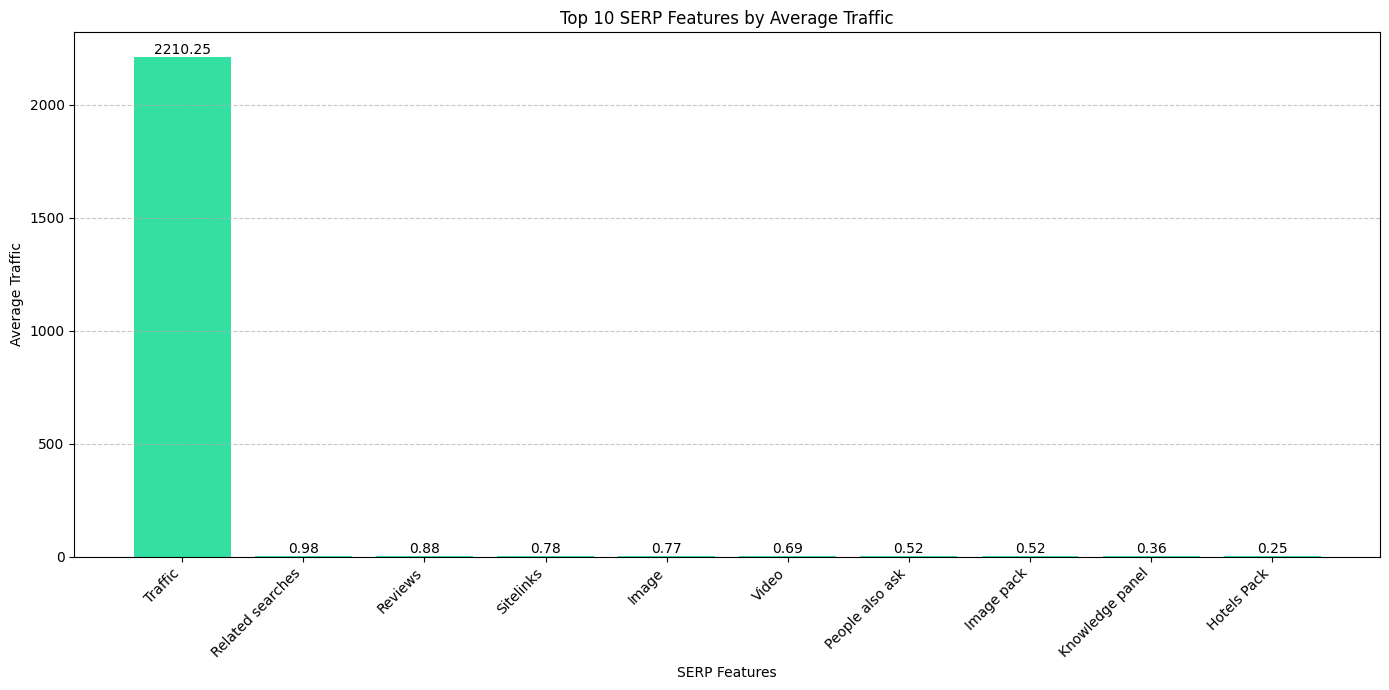

In [119]:
# Plot the impact of the top 10 SERP features on traffic
plt.figure(figsize=(14, 7))

bars = plt.bar(top_serp_features.index, top_serp_features, color='#33e0a1')
plt.xlabel('SERP Features')
plt.ylabel('Average Traffic')
plt.title('Top 10 SERP Features by Average Traffic')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


URL Performance Analysis:
Evaluate the performance of different URLs to see which pages are driving the most traffic and have the best rankings.
Identify opportunities for optimizing specific URLs to improve their rankings and traffic.

In [173]:
# Extract relevant columns
url_data = data[['URL', 'Traffic', 'Position', 'Search Volume', 'Keyword Difficulty']].dropna()

# Display the first few rows to confirm extraction
url_data.head(21)


URL  Traffic  Position  \
0             https://www.tripadvisor.com/Restaurants  3286800         2   
1             https://www.tripadvisor.com/Restaurants  1465200         2   
2   https://www.tripadvisor.com/ShowTopic-g60331-i...   473100         8   
3             https://www.tripadvisor.com/Restaurants   372000         1   
4                        https://www.tripadvisor.com/   360000         1   
5                        https://www.tripadvisor.com/   360000         1   
6             https://www.tripadvisor.com/Restaurants   204104         1   
7             https://www.tripadvisor.com/Attractions   132000         2   
8        https://www.tripadvisor.com/CheapFlightsHome   116280         4   
9             https://www.tripadvisor.com/Restaurants   111600         1   
10  https://www.tripadvisor.com/ShowTopic-g60331-i...    99600        14   
11            https://www.tripadvisor.com/Restaurants    91264         1   
12  https://www.tripadvisor.com/Restaurants-c8-Caf...    91264         1   
13            https://www.tripadvisor.com/Restaurants    91264         1   
14  https://www.tripadvisor.com/Restaurants-c29-Me...    88836         2   
15            https://www.tripadvisor.com/Restaurants    88836         2   
16  https://www.tripadvisor.com/Restaurants-g60763...    73700         9   
17  https://www.tripadvisor.com/Restaurants-c29-Me...    66000         4   
18            https://www.tripadvisor.com/Restaurants    55186         2   
19            https://www.tripadvisor.com/Restaurants    49848         1   
20  https://www.tripadvisor.com/Attraction_Review-...    44000         1   

    Search Volume  Keyword Difficulty  
0        24900000                  92  
1        11100000                  96  
2        24900000                  92  
3         1500000                  57  
4          450000                  73  
5          450000                 100  
6          823000                  82  
7         1000000                  55  
8         6120000                  74  
9          450000                 100  
10       24900000                  92  
11         368000                  63  
12         368000                  77  
13         368000                  85  
14         673000                  60  
15         673000                  82  
16        3350000                  80  
17        1500000                  66  
18         673000                  88  
19         201000                  33  
20         110000                  88

In [125]:
# Group by URL and calculate average metrics
url_performance = url_data.groupby('URL').agg({
    'Traffic': 'sum',
    'Position': 'mean',
    'Search Volume': 'mean',
    'Keyword Difficulty': 'mean'
}).reset_index()

# Display the performance data
url_performance.head()


URL  Traffic  Position  Search Volume  \
0               http://www.tripadvisor.com/    29700      10.0       450000.0   
1    https://ar.tripadvisor.com/Restaurants      892       1.0         3600.0   
2          https://careers.tripadvisor.com/     3680       1.0         2300.0   
3  https://careers.tripadvisor.com/all-jobs     1408       1.0          880.0   
4    https://cn.tripadvisor.com/Attractions      871       2.0         6600.0   

   Keyword Difficulty  
0                86.5  
1                94.0  
2                50.5  
3                53.0  
4                34.0

In [126]:
# Identify URLs with high search volume but lower rankings or high difficulty
optimization_opportunities = url_performance[
    (url_performance['Position'] > 5) & (url_performance['Search Volume'] > url_performance['Search Volume'].median())
]

# Display URLs with optimization opportunities
optimization_opportunities


URL  Traffic  Position  \
0                           http://www.tripadvisor.com/    29700      10.0   
36    https://www.tripadvisor.com/Airline_Review-d87...     1319       7.0   
84    https://www.tripadvisor.com/Attraction_Review-...      769       7.0   
105   https://www.tripadvisor.com/Attraction_Review-...      962       8.0   
146   https://www.tripadvisor.com/Attraction_Review-...      675       6.0   
...                                                 ...      ...       ...   
6139  https://www.tripadvisor.com/Tourism-g60724-Moa...     1719       7.0   
6144  https://www.tripadvisor.com/Tourism-g60766-Lit...     1331       6.0   
6147  https://www.tripadvisor.com/Tourism-g60806-Ast...      769       6.0   
6151  https://www.tripadvisor.com/Tourism-g60946-Pro...      769       6.0   
6152  https://www.tripadvisor.com/Tourism-g60956-San...     1104       7.0   

      Search Volume  Keyword Difficulty  
0          450000.0                86.5  
36         501450.0                51.5  
84          40500.0                51.0  
105         74000.0                67.0  
146        135000.0                60.0  
...             ...                 ...  
6139        90500.0                78.0  
6144        60500.0                79.0  
6147        40500.0                58.0  
6151        40500.0                85.0  
6152       368000.0               100.0  

[594 rows x 5 columns]

/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1870066204.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic', y='URL', data=url_performance.sort_values(by='Traffic', ascending=False).head(10), palette='viridis')


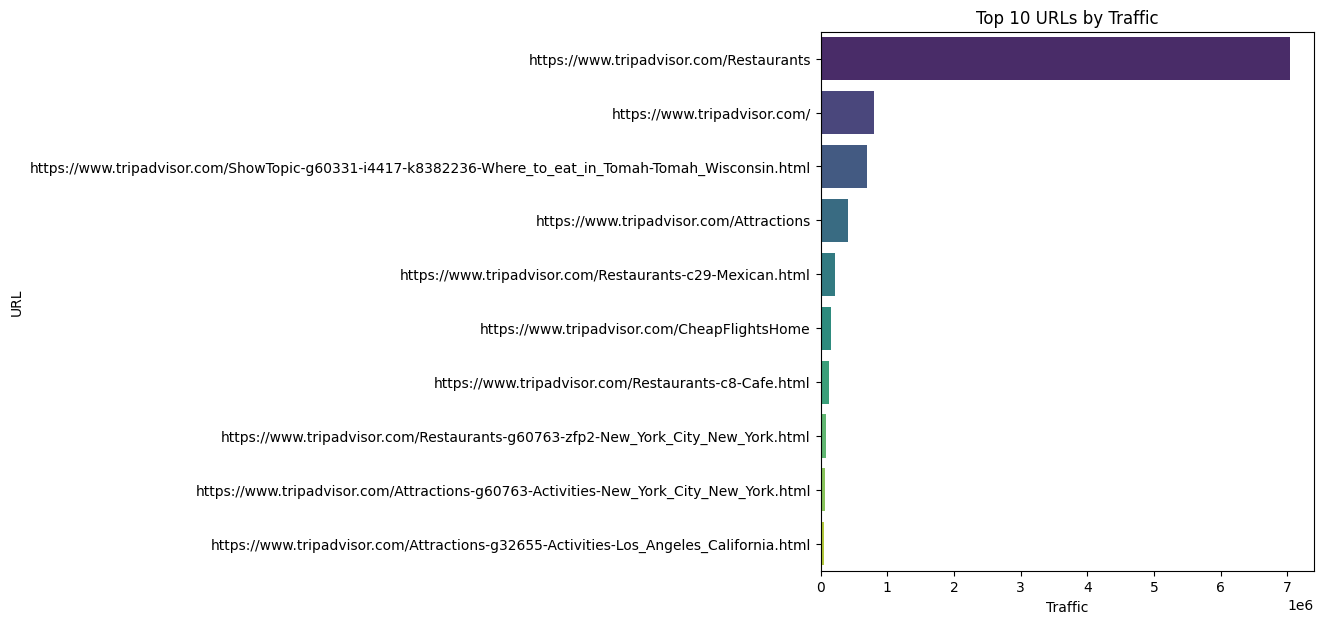

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the traffic and average position for each URL
plt.figure(figsize=(14, 7))

# Traffic by URL
plt.subplot(1, 2, 1)
sns.barplot(x='Traffic', y='URL', data=url_performance.sort_values(by='Traffic', ascending=False).head(10), palette='viridis')
plt.xlabel('Traffic')
plt.ylabel('URL')
plt.title('Top 10 URLs by Traffic')

plt. show()


/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1986251968.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic', y='URL', data=url_performance.sort_values(by='Traffic', ascending=False).head(20), palette=['#33e0a1'])
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1986251968.py:17: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Traffic', y='URL', data=url_performance.sort_values(by='Traffic', ascending=False).head(20), palette=['#33e0a1'])


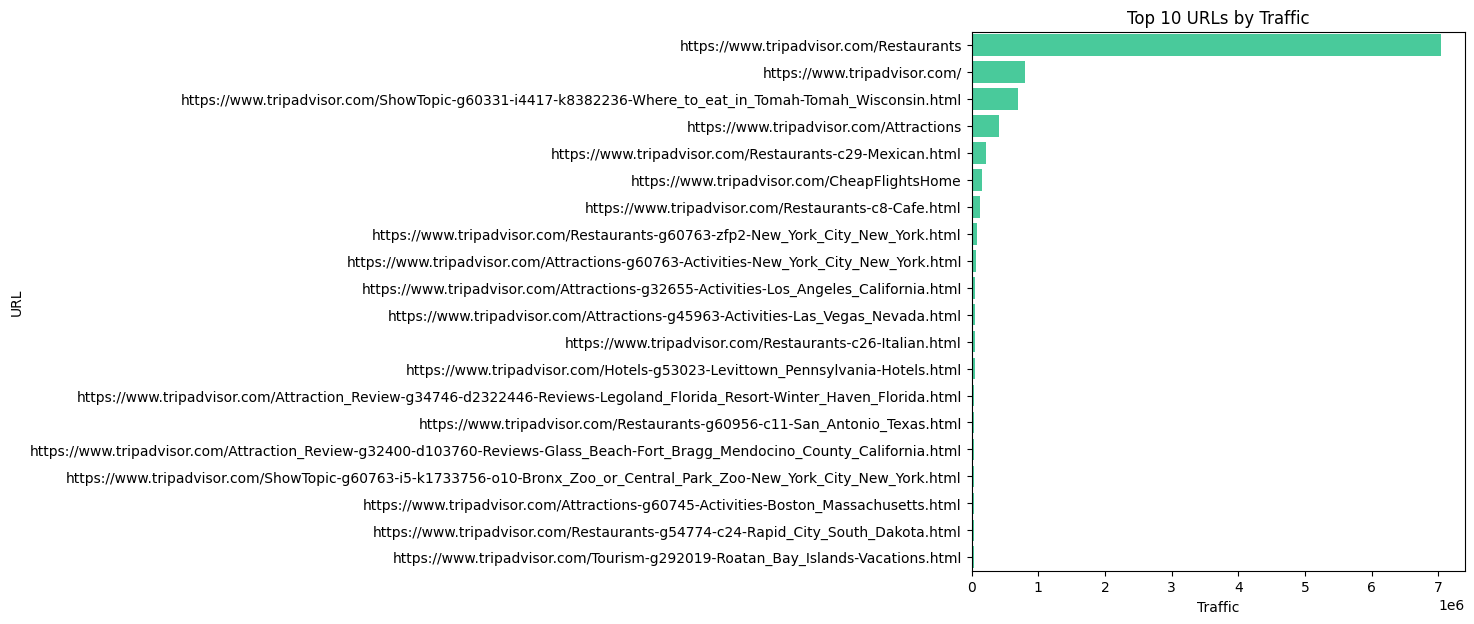

In [133]:
# Extract relevant columns
url_data = data[['URL', 'Traffic', 'Position', 'Search Volume', 'Keyword Difficulty']].dropna()

# Group by URL and calculate average metrics
url_performance = url_data.groupby('URL').agg({
    'Traffic': 'sum',
    'Position': 'mean',
    'Search Volume': 'mean',
    'Keyword Difficulty': 'mean'
}).reset_index()

# Plot the traffic and average position for each URL
plt.figure(figsize=(14, 7))

# Traffic by URL
plt.subplot(1, 2, 1)
sns.barplot(x='Traffic', y='URL', data=url_performance.sort_values(by='Traffic', ascending=False).head(20), palette=['#33e0a1'])
plt.xlabel('Traffic')
plt.ylabel('URL')
plt.title('Top 10 URLs by Traffic')

plt.show()

/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/24311828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='URL', data=url_performance.sort_values(by='Position').head(20), palette=['#33e0a1'])
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/24311828.py:3: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Position', y='URL', data=url_performance.sort_values(by='Position').head(20), palette=['#33e0a1'])
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/24311828.py:8: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


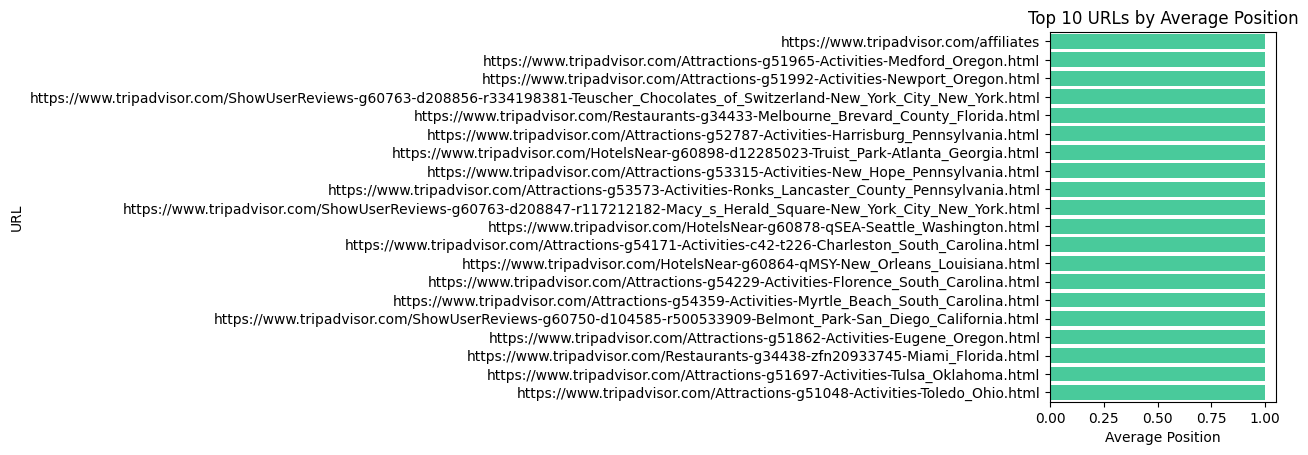

In [135]:
# Position by URL
plt.subplot(1, 2, 2)
sns.barplot(x='Position', y='URL', data=url_performance.sort_values(by='Position').head(20), palette=['#33e0a1'])
plt.xlabel('Average Position')
plt.ylabel('URL')
plt.title('Top 10 URLs by Average Position')

plt.tight_layout()
plt.show()

In [137]:
# Extract relevant columns
url_difficulty_data = data[['URL', 'Keyword Difficulty']].dropna()

# Display the first few rows to confirm extraction
url_difficulty_data.head(20)


URL  Keyword Difficulty
0             https://www.tripadvisor.com/Restaurants                  92
1             https://www.tripadvisor.com/Restaurants                  96
2   https://www.tripadvisor.com/ShowTopic-g60331-i...                  92
3             https://www.tripadvisor.com/Restaurants                  57
4                        https://www.tripadvisor.com/                  73
5                        https://www.tripadvisor.com/                 100
6             https://www.tripadvisor.com/Restaurants                  82
7             https://www.tripadvisor.com/Attractions                  55
8        https://www.tripadvisor.com/CheapFlightsHome                  74
9             https://www.tripadvisor.com/Restaurants                 100
10  https://www.tripadvisor.com/ShowTopic-g60331-i...                  92
11            https://www.tripadvisor.com/Restaurants                  63
12  https://www.tripadvisor.com/Restaurants-c8-Caf...                  77
13            https://www.tripadvisor.com/Restaurants                  85
14  https://www.tripadvisor.com/Restaurants-c29-Me...                  60
15            https://www.tripadvisor.com/Restaurants                  82
16  https://www.tripadvisor.com/Restaurants-g60763...                  80
17  https://www.tripadvisor.com/Restaurants-c29-Me...                  66
18            https://www.tripadvisor.com/Restaurants                  88
19            https://www.tripadvisor.com/Restaurants                  33

In [138]:
# Group by URL and calculate average keyword difficulty
avg_difficulty_per_url = url_difficulty_data.groupby('URL').agg({
    'Keyword Difficulty': 'mean'
}).reset_index()

# Display the average keyword difficulty per URL
avg_difficulty_per_url.head()


URL  Keyword Difficulty
0               http://www.tripadvisor.com/                86.5
1    https://ar.tripadvisor.com/Restaurants                94.0
2          https://careers.tripadvisor.com/                50.5
3  https://careers.tripadvisor.com/all-jobs                53.0
4    https://cn.tripadvisor.com/Attractions                34.0

/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1694801443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword Difficulty', y='URL', data=avg_difficulty_per_url.sort_values(by='Keyword Difficulty', ascending=False).head(10), palette=['#33e0a1'])
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1694801443.py:6: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Keyword Difficulty', y='URL', data=avg_difficulty_per_url.sort_values(by='Keyword Difficulty', ascending=False).head(10), palette=['#33e0a1'])


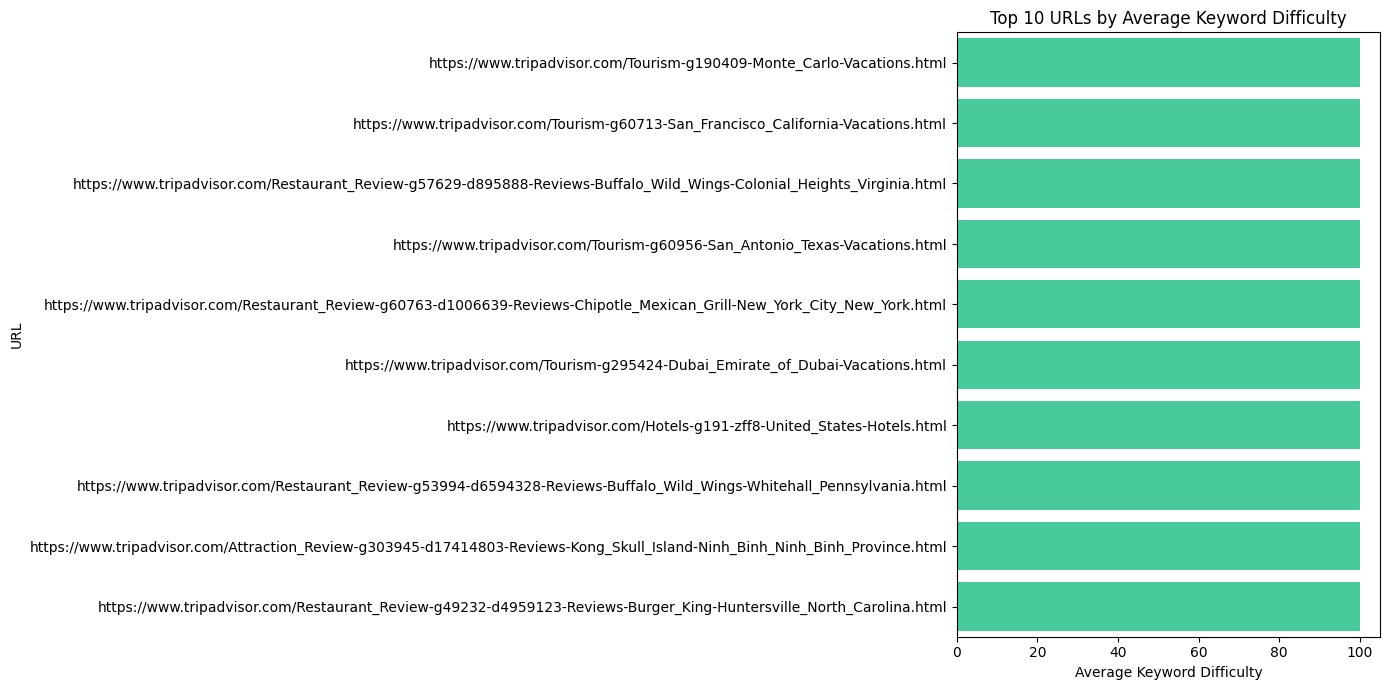

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the average keyword difficulty per URL
plt.figure(figsize=(14, 7))
sns.barplot(x='Keyword Difficulty', y='URL', data=avg_difficulty_per_url.sort_values(by='Keyword Difficulty', ascending=False).head(10), palette=['#33e0a1'])
plt.xlabel('Average Keyword Difficulty')
plt.ylabel('URL')
plt.title('Top 10 URLs by Average Keyword Difficulty')
plt.tight_layout()
plt.show()


In [143]:
# Extract relevant columns
traffic_difficulty_data = data[['URL', 'Traffic', 'Keyword Difficulty']].dropna()

# Display the first few rows to confirm extraction
traffic_difficulty_data.head(20)


URL  Traffic  \
0             https://www.tripadvisor.com/Restaurants  3286800   
1             https://www.tripadvisor.com/Restaurants  1465200   
2   https://www.tripadvisor.com/ShowTopic-g60331-i...   473100   
3             https://www.tripadvisor.com/Restaurants   372000   
4                        https://www.tripadvisor.com/   360000   
5                        https://www.tripadvisor.com/   360000   
6             https://www.tripadvisor.com/Restaurants   204104   
7             https://www.tripadvisor.com/Attractions   132000   
8        https://www.tripadvisor.com/CheapFlightsHome   116280   
9             https://www.tripadvisor.com/Restaurants   111600   
10  https://www.tripadvisor.com/ShowTopic-g60331-i...    99600   
11            https://www.tripadvisor.com/Restaurants    91264   
12  https://www.tripadvisor.com/Restaurants-c8-Caf...    91264   
13            https://www.tripadvisor.com/Restaurants    91264   
14  https://www.tripadvisor.com/Restaurants-c29-Me...    88836   
15            https://www.tripadvisor.com/Restaurants    88836   
16  https://www.tripadvisor.com/Restaurants-g60763...    73700   
17  https://www.tripadvisor.com/Restaurants-c29-Me...    66000   
18            https://www.tripadvisor.com/Restaurants    55186   
19            https://www.tripadvisor.com/Restaurants    49848   

    Keyword Difficulty  
0                   92  
1                   96  
2                   92  
3                   57  
4                   73  
5                  100  
6                   82  
7                   55  
8                   74  
9                  100  
10                  92  
11                  63  
12                  77  
13                  85  
14                  60  
15                  82  
16                  80  
17                  66  
18                  88  
19                  33

In [145]:
import pandas as pd
import numpy as np

# Simulate data
np.random.seed(0)
data = pd.DataFrame({
    'Age Group': np.random.choice(['18-25', '26-35', '36-45', '46-55', '56-65', '65+'], 1000),
    'Income Bracket': np.random.choice(['<20K', '20K-50K', '50K-100K', '100K-150K', '150K+'], 1000),
    'Spending': np.random.rand(1000) * 1000  # Spending between 0 and 1000
})

# Display the first few rows to understand the structure
data.head()


Age Group Income Bracket    Spending
0     56-65        20K-50K  339.843040
1       65+          150K+  218.128013
2     18-25       50K-100K  308.819108
3     46-55        20K-50K  506.965726
4     46-55          150K+  221.781050

In [151]:
# Calculate average spending for different income brackets and age groups
aggregated_data = data.groupby(['Age Group', 'Income Bracket']).agg({'Spending': 'mean'}).reset_index()

# Display the aggregated data
aggregated_data.head(50)


Age Group Income Bracket    Spending
0      18-25      100K-150K  432.797933
1      18-25          150K+  585.878026
2      18-25        20K-50K  471.703347
3      18-25       50K-100K  419.097240
4      18-25           <20K  554.327442
5      26-35      100K-150K  528.881600
6      26-35          150K+  453.650816
7      26-35        20K-50K  454.176572
8      26-35       50K-100K  500.220050
9      26-35           <20K  474.474746
10     36-45      100K-150K  488.115596
11     36-45          150K+  477.156071
12     36-45        20K-50K  413.296249
13     36-45       50K-100K  531.038244
14     36-45           <20K  390.181138
15     46-55      100K-150K  513.213312
16     46-55          150K+  670.786380
17     46-55        20K-50K  503.491875
18     46-55       50K-100K  587.405041
19     46-55           <20K  441.075943
20     56-65      100K-150K  534.331249
21     56-65          150K+  500.362909
22     56-65        20K-50K  581.010703
23     56-65       50K-100K  487.605331
24     56-65           <20K  595.793119
25       65+      100K-150K  560.772318
26       65+          150K+  434.102718
27       65+        20K-50K  434.530385
28       65+       50K-100K  578.026280
29       65+           <20K  571.509398

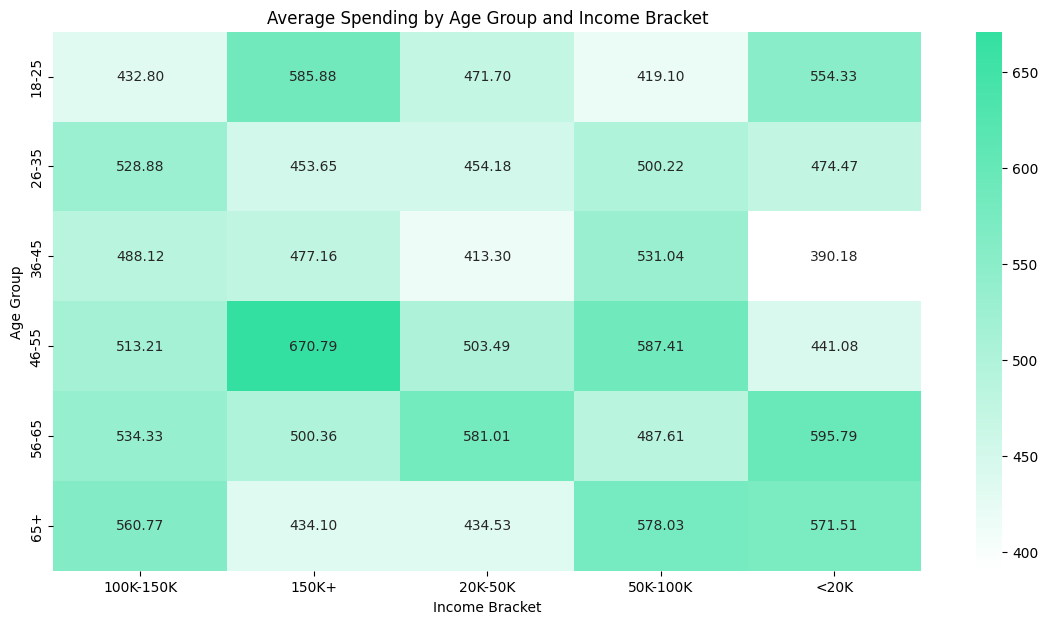

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Simulate data
np.random.seed(0)
data = pd.DataFrame({
    'Age Group': np.random.choice(['18-25', '26-35', '36-45', '46-55', '56-65', '65+'], 1000),
    'Income Bracket': np.random.choice(['<20K', '20K-50K', '50K-100K', '100K-150K', '150K+'], 1000),
    'Spending': np.random.rand(1000) * 1000  # Spending between 0 and 1000
})

# Calculate average spending for different income brackets and age groups
aggregated_data = data.groupby(['Age Group', 'Income Bracket']).agg({'Spending': 'mean'}).reset_index()

# Create a pivot table for heatmap
pivot_table = aggregated_data.pivot(index='Age Group', columns='Income Bracket', values='Spending')

# Define the custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['white', '#33e0a1'])

# Plot the heatmap using the custom colormap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=custom_cmap)
plt.title('Average Spending by Age Group and Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Age Group')
plt.show()


In [157]:
import pandas as pd
import numpy as np

# Simulate data
np.random.seed(0)
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female', 'Non-Binary', 'Other'], 1000),
    'Age Group': np.random.choice(['18-25', '26-35', '36-45', '46-55', '56-65', '65+'], 1000),
    'Income Bracket': np.random.choice(['<20K', '20K-50K', '50K-100K', '100K-150K', '150K+'], 1000),
    'Spending': np.random.rand(1000) * 1000  # Spending between 0 and 1000
})

# Display the first few rows to understand the structure
print(data.head(20))


        Gender Age Group Income Bracket    Spending
0         Male     36-45       50K-100K  963.469995
1        Other     46-55       50K-100K  304.964183
2       Female     56-65           <20K  941.439292
3         Male     18-25        20K-50K   75.610673
4        Other     36-45      100K-150K  460.803042
5        Other     46-55       50K-100K  129.619049
6        Other     56-65        20K-50K    4.787385
7        Other     46-55       50K-100K  553.766074
8       Female       65+       50K-100K  113.894105
9        Other     18-25           <20K  722.024531
10      Female     36-45      100K-150K  698.116376
11  Non-Binary     46-55      100K-150K  176.332907
12        Male     46-55       50K-100K  941.742143
13       Other     46-55        20K-50K  721.043408
14  Non-Binary     26-35      100K-150K  297.970264
15        Male     46-55           <20K  709.233764
16        Male     36-45      100K-150K  731.930278
17        Male     36-45           <20K  342.226331
18  Non-Bina

In [158]:
# Calculate average spending for different genders
aggregated_data = data.groupby('Gender').agg({'Spending': 'mean'}).reset_index()

# Display the aggregated data
print(aggregated_data)


       Gender    Spending
0      Female  516.305007
1        Male  507.494903
2  Non-Binary  499.289623
3       Other  501.421003


/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/3940579808.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Gender', y='Spending', data=aggregated_data, palette=['#33e0a1'])
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/3940579808.py:20: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  bar_plot = sns.barplot(x='Gender', y='Spending', data=aggregated_data, palette=['#33e0a1'])


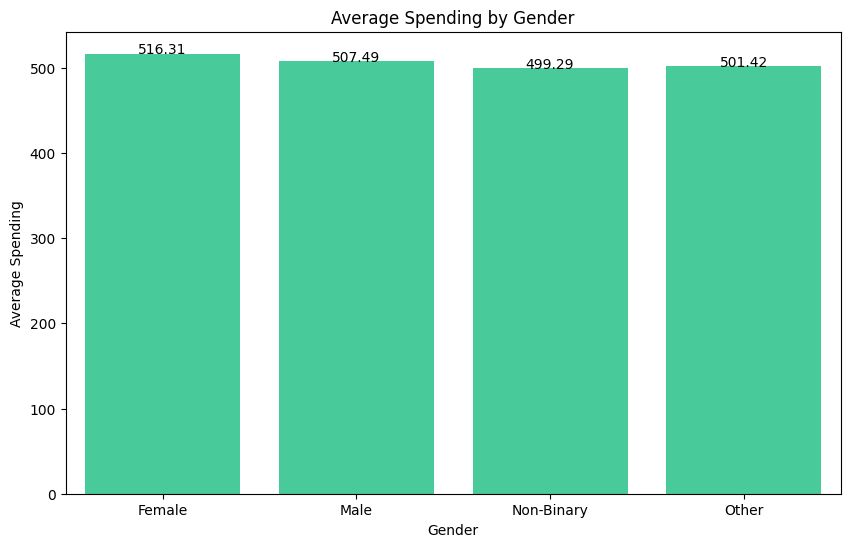

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data
np.random.seed(0)
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female', 'Non-Binary', 'Other'], 1000),
    'Age Group': np.random.choice(['18-25', '26-35', '36-45', '46-55', '56-65', '65+'], 1000),
    'Income Bracket': np.random.choice(['<20K', '20K-50K', '50K-100K', '100K-150K', '150K+'], 1000),
    'Spending': np.random.rand(1000) * 1000  # Spending between 0 and 1000
})

# Calculate average spending for different genders
aggregated_data = data.groupby('Gender').agg({'Spending': 'mean'}).reset_index()

# Plot the average spending for different genders
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Gender', y='Spending', data=aggregated_data, palette=['#33e0a1'])
plt.title('Average Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending')

# Adding data labels
for index, row in aggregated_data.iterrows():
    bar_plot.text(row.name, row.Spending, round(row.Spending, 2), color='black', ha="center")

plt.show()


/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/3091701872.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Age Group', y='Spending', data=aggregated_data, palette=['#33e0a1'])
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/3091701872.py:18: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  bar_plot = sns.barplot(x='Age Group', y='Spending', data=aggregated_data, palette=['#33e0a1'])


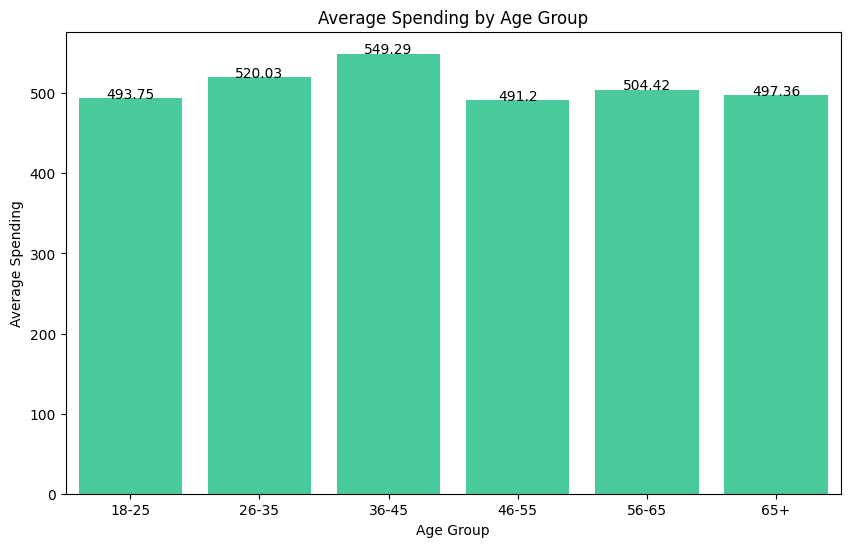

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data
np.random.seed(0)
data = pd.DataFrame({
    'Age Group': np.random.choice(['18-25', '26-35', '36-45', '46-55', '56-65', '65+'], 1000),
    'Spending': np.random.rand(1000) * 1000  # Spending between 0 and 1000
})

# Calculate average spending for different age groups
aggregated_data = data.groupby('Age Group').agg({'Spending': 'mean'}).reset_index()

# Plot the average spending for different age groups
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Age Group', y='Spending', data=aggregated_data, palette=['#33e0a1'])
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')

# Adding data labels
for index, row in aggregated_data.iterrows():
    bar_plot.text(row.name, row.Spending, round(row.Spending, 2), color='black', ha="center")

plt.show()


/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1644352180.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_traffic = sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette=custom_palette)
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1644352180.py:12: UserWarning: 
The palette list has fewer values (1) than needed (9) and will cycle, which may produce an uninterpretable plot.
  bar_plot_traffic = sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette=custom_palette)
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1644352180.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_traffic_cost = 

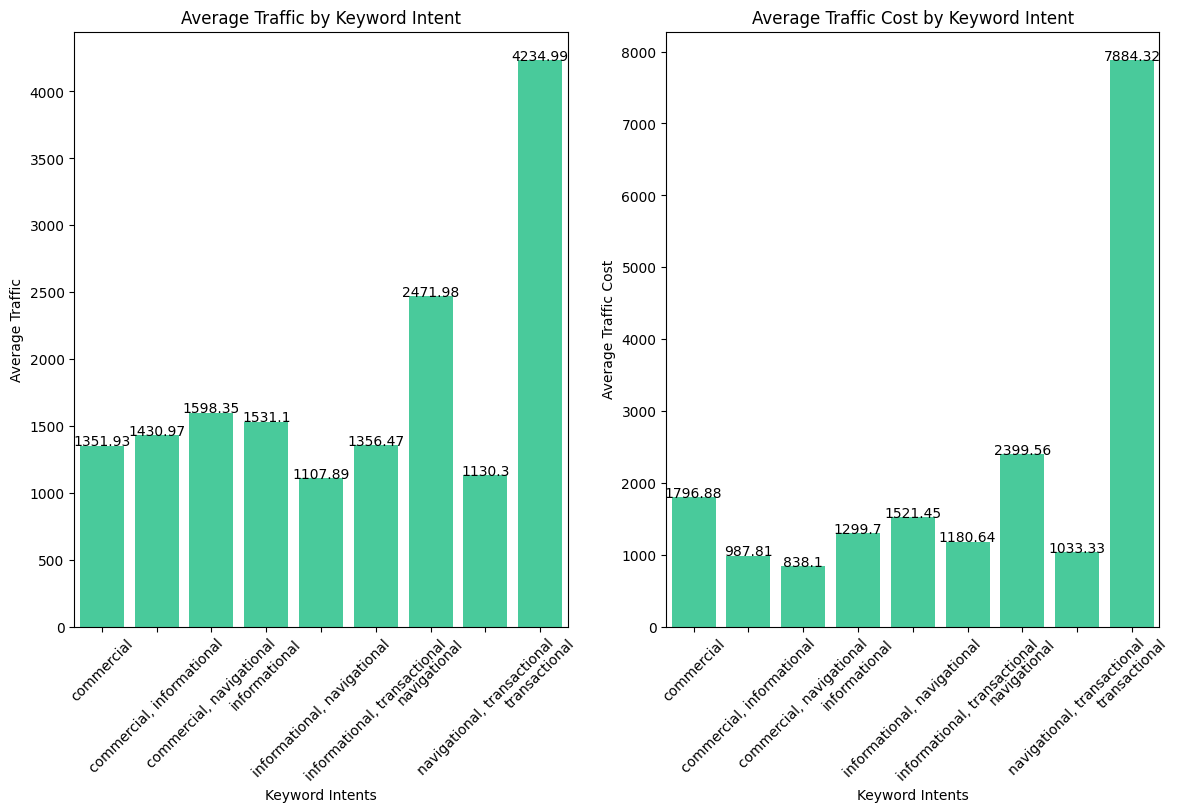

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot performance metrics by keyword intent
plt.figure(figsize=(14, 17))

# Define the custom color palette
custom_palette = ['#33e0a1']

# Traffic by Intent
plt.subplot(2, 2, 1)
bar_plot_traffic = sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette=custom_palette)
plt.xlabel('Keyword Intents')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Keyword Intent')
plt.xticks(rotation=45)
for index, row in intent_performance.iterrows():
    bar_plot_traffic.text(index, row['Traffic'], round(row['Traffic'], 2), color='black', ha="center")

# Traffic Cost by Intent
plt.subplot(2, 2, 2)
bar_plot_traffic_cost = sns.barplot(x='Keyword Intents', y='Traffic Cost', data=intent_performance, palette=custom_palette)
plt.xlabel('Keyword Intents')
plt.ylabel('Average Traffic Cost')
plt.title('Average Traffic Cost by Keyword Intent')
plt.xticks(rotation=45)
for index, row in intent_performance.iterrows():
    bar_plot_traffic_cost.text(index, row['Traffic Cost'], round(row['Traffic Cost'], 2), color='black', ha="center")

plt.show()

/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1152605853.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_traffic = sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette=custom_palette)
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1152605853.py:12: UserWarning: 
The palette list has fewer values (1) than needed (9) and will cycle, which may produce an uninterpretable plot.
  bar_plot_traffic = sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette=custom_palette)
/var/folders/8g/l6159h8j29v1r4jx5mdnjtj40000gn/T/ipykernel_29396/1152605853.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_traffic_cost = 

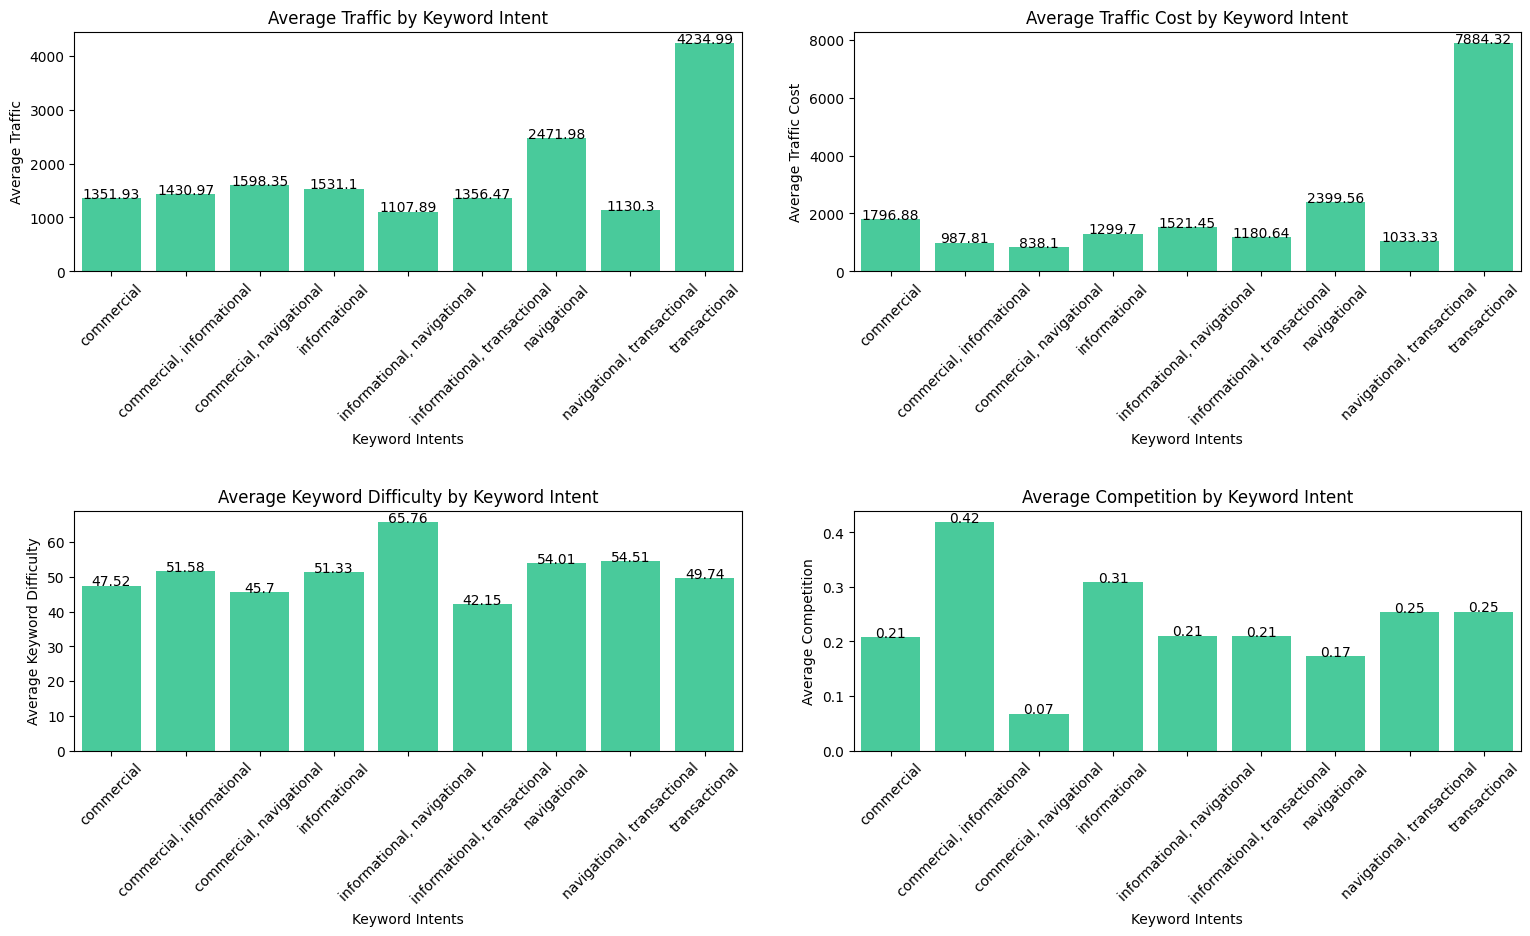

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot performance metrics by keyword intent
plt.figure(figsize=(16, 10))  # Increase the figure size

# Define the custom color palette
custom_palette = ['#33e0a1']

# Traffic by Intent
plt.subplot(2, 2, 1)
bar_plot_traffic = sns.barplot(x='Keyword Intents', y='Traffic', data=intent_performance, palette=custom_palette)
plt.xlabel('Keyword Intents')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Keyword Intent')
plt.xticks(rotation=45)
for index, row in intent_performance.iterrows():
    bar_plot_traffic.text(index, row['Traffic'], round(row['Traffic'], 2), color='black', ha="center")

# Traffic Cost by Intent
plt.subplot(2, 2, 2)
bar_plot_traffic_cost = sns.barplot(x='Keyword Intents', y='Traffic Cost', data=intent_performance, palette=custom_palette)
plt.xlabel('Keyword Intents')
plt.ylabel('Average Traffic Cost')
plt.title('Average Traffic Cost by Keyword Intent')
plt.xticks(rotation=45)
for index, row in intent_performance.iterrows():
    bar_plot_traffic_cost.text(index, row['Traffic Cost'], round(row['Traffic Cost'], 2), color='black', ha="center")

# Keyword Difficulty by Intent
plt.subplot(2, 2, 3)
bar_plot_keyword_difficulty = sns.barplot(x='Keyword Intents', y='Keyword Difficulty', data=intent_performance, palette=custom_palette)
plt.xlabel('Keyword Intents')
plt.ylabel('Average Keyword Difficulty')
plt.title('Average Keyword Difficulty by Keyword Intent')
plt.xticks(rotation=45)
for index, row in intent_performance.iterrows():
    bar_plot_keyword_difficulty.text(index, row['Keyword Difficulty'], round(row['Keyword Difficulty'], 2), color='black', ha="center")

# Competition by Intent
plt.subplot(2, 2, 4)
bar_plot_competition = sns.barplot(x='Keyword Intents', y='Competition', data=intent_performance, palette=custom_palette)
plt.xlabel('Keyword Intents')
plt.ylabel('Average Competition')
plt.title('Average Competition by Keyword Intent')
plt.xticks(rotation=45)
for index, row in intent_performance.iterrows():
    bar_plot_competition.text(index, row['Competition'], round(row['Competition'], 2), color='black', ha="center")

plt.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()


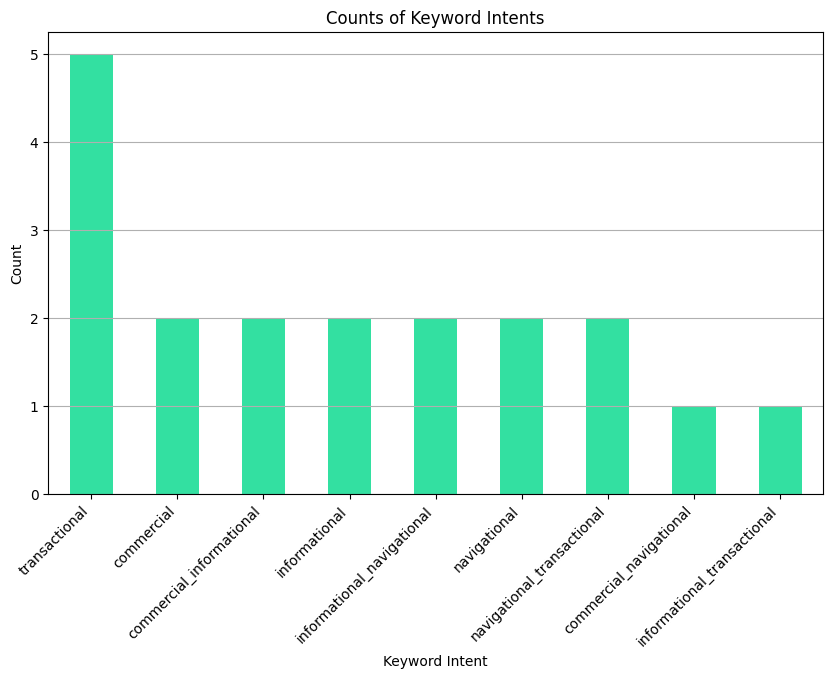

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data creation (replace this with your actual DataFrame)
# Replace 'intent_data' with your actual DataFrame and 'intent' with the correct column name
intent_data = pd.DataFrame({
    'intent': ['commercial', 'commercial', 'commercial_informational', 'commercial_informational',
               'commercial_navigational', 'informational', 'informational', 'informational_navigational',
               'informational_navigational', 'informational_transactional', 'navigational', 'navigational',
               'navigational_transactional', 'navigational_transactional', 'transactional', 'transactional',
               'transactional', 'transactional', 'transactional']
})

# Count the occurrences of each intent
intent_counts = intent_data['intent'].value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))
intent_counts.plot(kind='bar', color='#33e0a1')
plt.xlabel('Keyword Intent')
plt.ylabel('Count')
plt.title('Counts of Keyword Intents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


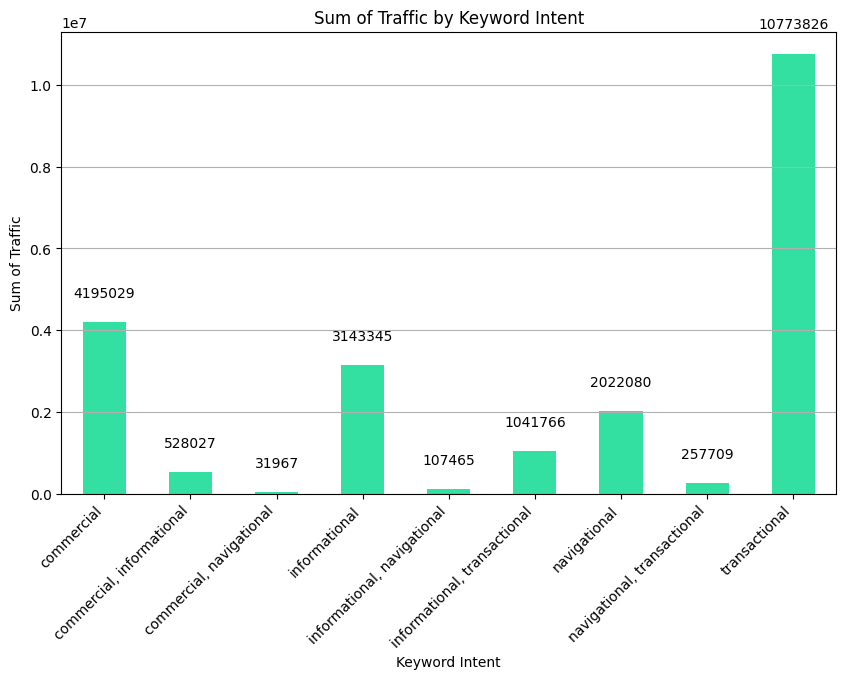

In [188]:
# Sum the Traffic values grouped by Keyword Intents
intent_sums = df.groupby('Keyword Intents')['Traffic'].sum()

# Plotting the sums
plt.figure(figsize=(10, 6))
bars = intent_sums.plot(kind='bar', color='#33e0a1')
plt.xlabel('Keyword Intent')
plt.ylabel('Sum of Traffic')
plt.title('Sum of Traffic by Keyword Intent')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Labeling the bars with sums
for i, value in enumerate(intent_sums):
    plt.text(i, value + 0.05 * max(intent_sums), str(value), ha='center', va='bottom')

plt.show()

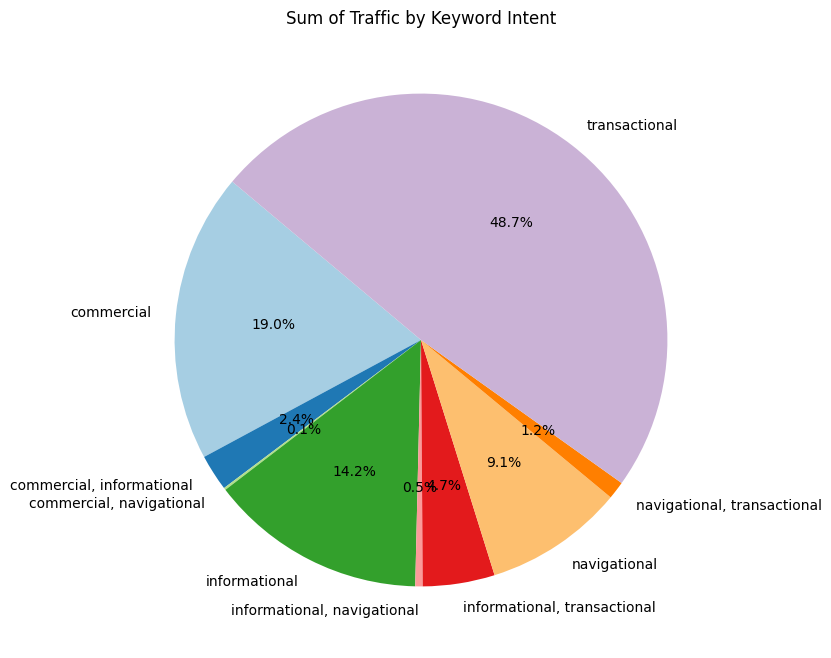

In [189]:
# Sum the Traffic values grouped by Keyword Intents
intent_sums = df.groupby('Keyword Intents')['Traffic'].sum()

# Plotting the sums as a pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.Paired(range(len(intent_sums)))  # Using a colormap for bright colors

intent_sums.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
plt.ylabel('')
plt.title('Sum of Traffic by Keyword Intent')
plt.show()


In [195]:
%pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [196]:
import pandas as pd
from tabulate import tabulate


# Create a summary table with the sum of traffic by keyword intent
summary_table = df.groupby('Keyword Intents')['Traffic'].sum().reset_index()
summary_table = summary_table.rename(columns={'Keyword Intents': 'Keyword Intent', 'Traffic': 'Total Traffic'})

# Display the summary table
print(tabulate(summary_table, headers='keys', tablefmt='grid'))



+----+------------------------------+-----------------+
|    | Keyword Intent               |   Total Traffic |
+====+==============================+=================+
|  0 | commercial                   |         4195029 |
+----+------------------------------+-----------------+
|  1 | commercial, informational    |          528027 |
+----+------------------------------+-----------------+
|  2 | commercial, navigational     |           31967 |
+----+------------------------------+-----------------+
|  3 | informational                |         3143345 |
+----+------------------------------+-----------------+
|  4 | informational, navigational  |          107465 |
+----+------------------------------+-----------------+
|  5 | informational, transactional |         1041766 |
+----+------------------------------+-----------------+
|  6 | navigational                 |         2022080 |
+----+------------------------------+-----------------+
|  7 | navigational, transactional  |          2

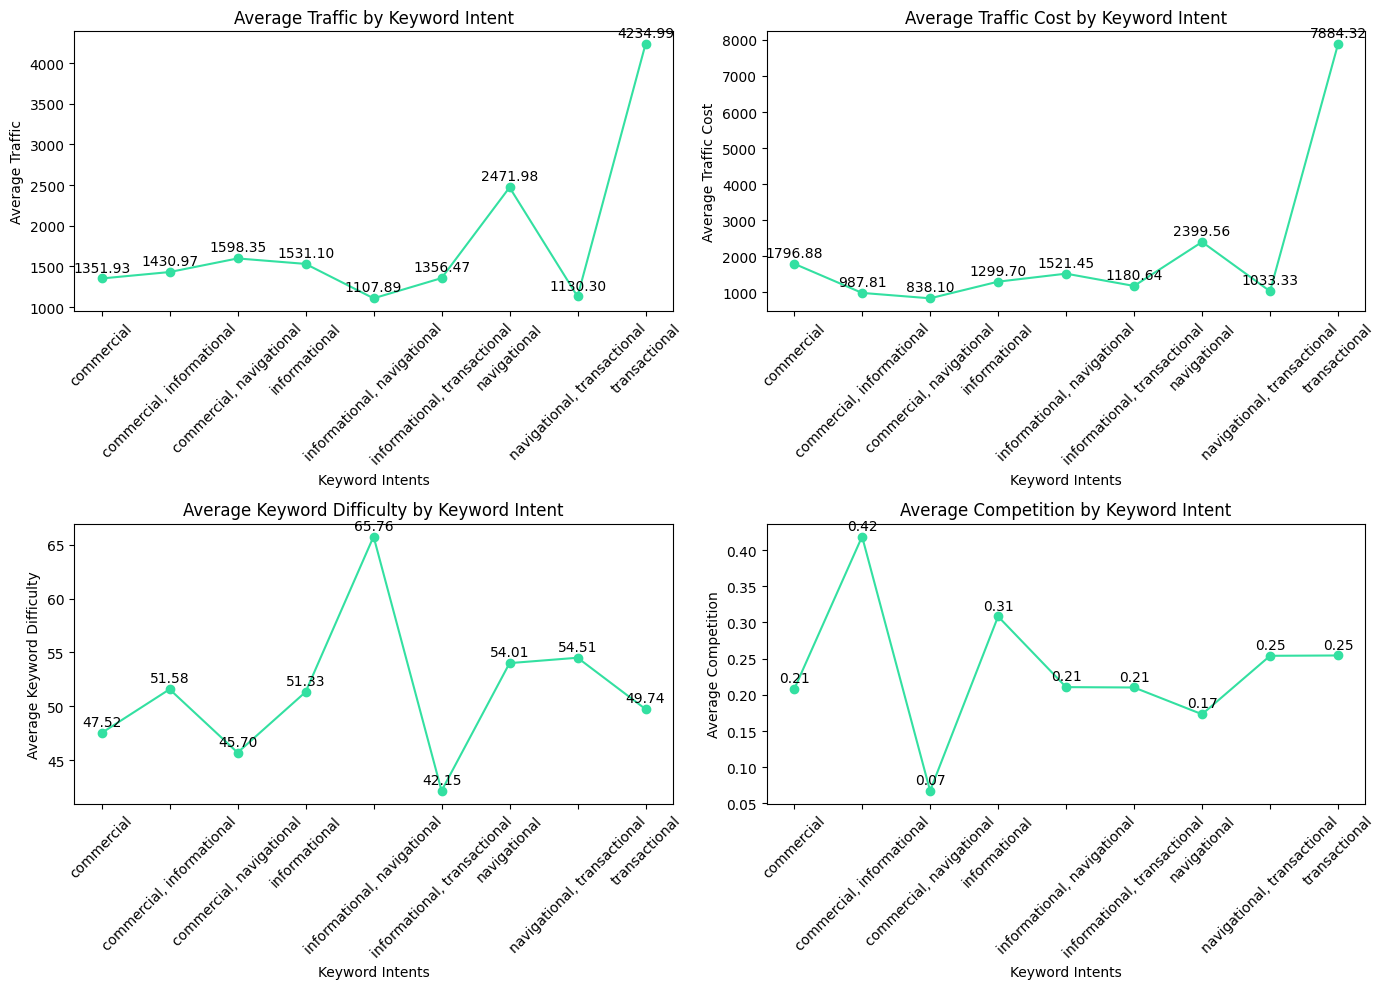

In [198]:
# Select only numeric columns for averaging
numeric_cols = ['Traffic', 'Traffic Cost', 'Keyword Difficulty', 'Competition']
avg_summary = df.groupby('Keyword Intents')[numeric_cols].mean().reset_index()

# Create line graphs with data labels
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Average Traffic by Keyword Intent
axs[0, 0].plot(avg_summary['Keyword Intents'], avg_summary['Traffic'], marker='o', linestyle='-', color='#33e0a1')
axs[0, 0].set_title('Average Traffic by Keyword Intent')
axs[0, 0].set_xlabel('Keyword Intents')
axs[0, 0].set_ylabel('Average Traffic')
axs[0, 0].tick_params(axis='x', rotation=45)
for i, txt in enumerate(avg_summary['Traffic']):
    axs[0, 0].annotate(f'{txt:.2f}', (avg_summary['Keyword Intents'][i], avg_summary['Traffic'][i]), textcoords="offset points", xytext=(0,5), ha='center')

# Average Traffic Cost by Keyword Intent
axs[0, 1].plot(avg_summary['Keyword Intents'], avg_summary['Traffic Cost'], marker='o', linestyle='-', color='#33e0a1')
axs[0, 1].set_title('Average Traffic Cost by Keyword Intent')
axs[0, 1].set_xlabel('Keyword Intents')
axs[0, 1].set_ylabel('Average Traffic Cost')
axs[0, 1].tick_params(axis='x', rotation=45)
for i, txt in enumerate(avg_summary['Traffic Cost']):
    axs[0, 1].annotate(f'{txt:.2f}', (avg_summary['Keyword Intents'][i], avg_summary['Traffic Cost'][i]), textcoords="offset points", xytext=(0,5), ha='center')

# Average Keyword Difficulty by Keyword Intent
axs[1, 0].plot(avg_summary['Keyword Intents'], avg_summary['Keyword Difficulty'], marker='o', linestyle='-', color='#33e0a1')
axs[1, 0].set_title('Average Keyword Difficulty by Keyword Intent')
axs[1, 0].set_xlabel('Keyword Intents')
axs[1, 0].set_ylabel('Average Keyword Difficulty')
axs[1, 0].tick_params(axis='x', rotation=45)
for i, txt in enumerate(avg_summary['Keyword Difficulty']):
    axs[1, 0].annotate(f'{txt:.2f}', (avg_summary['Keyword Intents'][i], avg_summary['Keyword Difficulty'][i]), textcoords="offset points", xytext=(0,5), ha='center')

# Average Competition by Keyword Intent
axs[1, 1].plot(avg_summary['Keyword Intents'], avg_summary['Competition'], marker='o', linestyle='-', color='#33e0a1')
axs[1, 1].set_title('Average Competition by Keyword Intent')
axs[1, 1].set_xlabel('Keyword Intents')
axs[1, 1].set_ylabel('Average Competition')
axs[1, 1].tick_params(axis='x', rotation=45)
for i, txt in enumerate(avg_summary['Competition']):
    axs[1, 1].annotate(f'{txt:.2f}', (avg_summary['Keyword Intents'][i], avg_summary['Competition'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()
plt.show()
